Training data size=10, Test data size=3

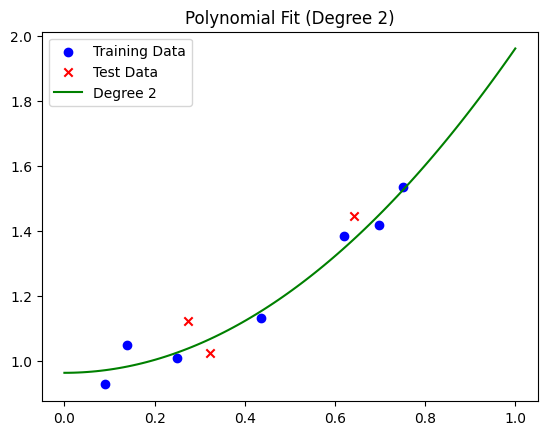

Degree 2 - Training MSE: 0.001307443963589339, Test MSE: 0.00461646573828427


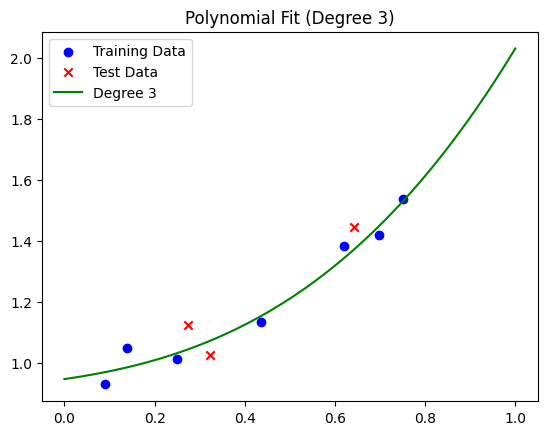

Degree 3 - Training MSE: 0.0012971289242642054, Test MSE: 0.00465668942764375


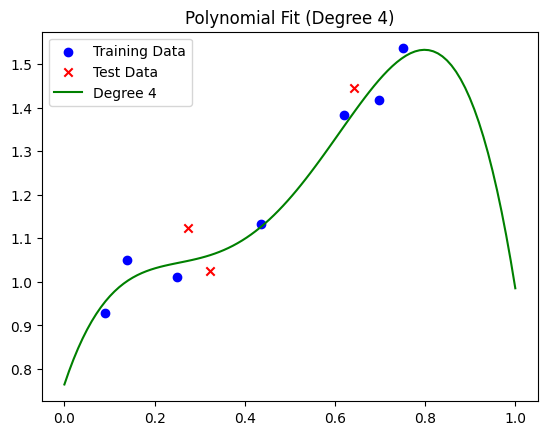

Degree 4 - Training MSE: 0.0010037843218253131, Test MSE: 0.003378206747478295


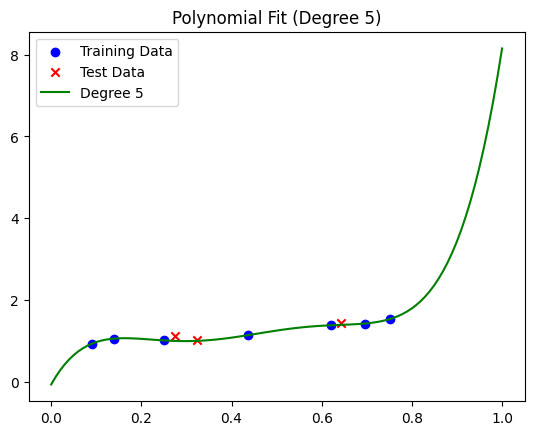

Degree 5 - Training MSE: 1.1551063332889289e-05, Test MSE: 0.0068471530937765845


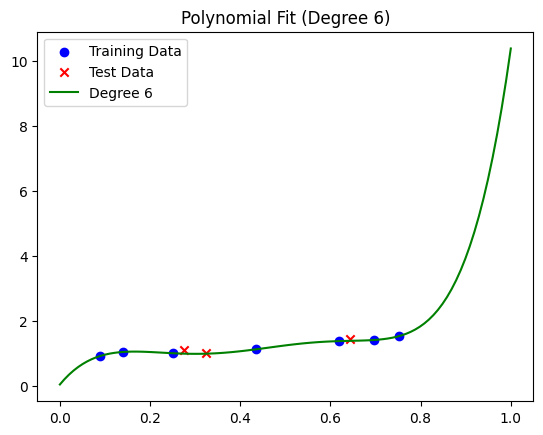

Degree 6 - Training MSE: 3.6866921367438224e-29, Test MSE: 0.00658615277350065


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.75335e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


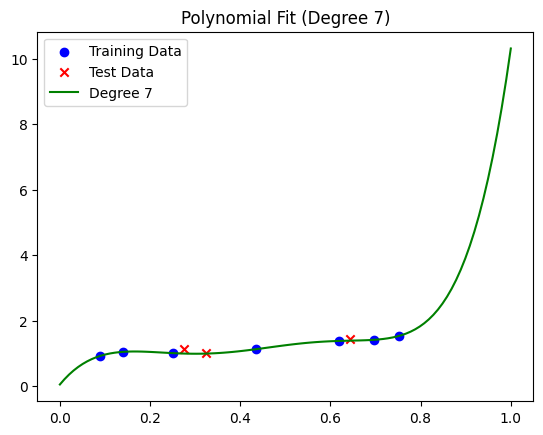

Degree 7 - Training MSE: 4.574270680590661e-21, Test MSE: 0.0065926982211752805


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=2.23229e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


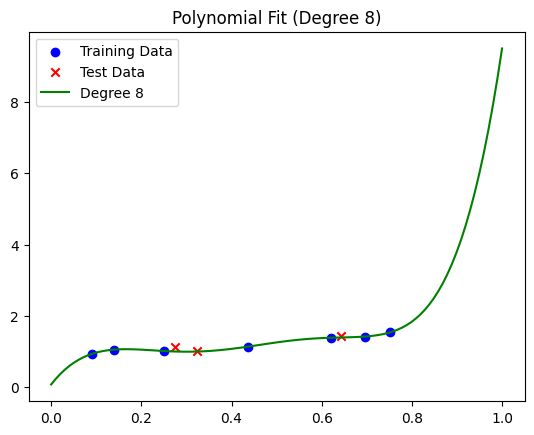

Degree 8 - Training MSE: 8.874388047859078e-21, Test MSE: 0.006648328516559943


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.23353e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


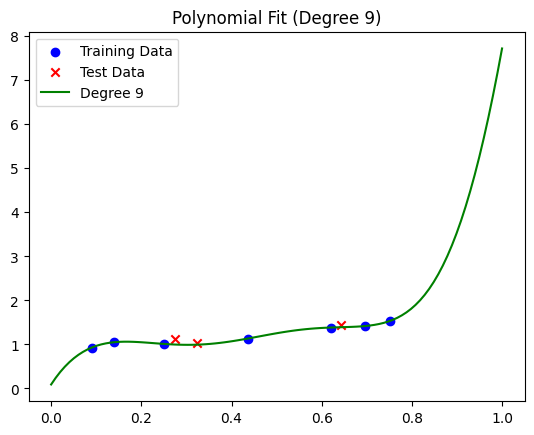

Degree 9 - Training MSE: 1.2356983050240416e-21, Test MSE: 0.006729649429422
Coefficient [array([ 9.96315024e-01, -8.78413122e-04,  9.64736230e-01]), array([0.48063487, 0.39088594, 0.21157224, 0.94675377]), array([-14.16773321,  24.48740925, -13.20605399,   3.10726207,
         0.76434625]), array([ 1.92668427e+02, -4.23725643e+02,  3.43876571e+02, -1.24381557e+02,
        1.97824141e+01, -6.94627101e-02]), array([ 9.63260372e+01, -4.52447856e+01, -1.95335534e+02,  2.36322930e+02,
       -9.86060209e+01,  1.68564120e+01,  5.13242127e-02]), array([-4.47550771e+01,  2.29875187e+02, -2.06106303e+02, -9.52384195e+01,
        2.02110738e+02, -9.22922193e+01,  1.62817506e+01,  7.11563000e-02]), array([-1.48491937e+02,  3.07940460e+02, -3.40771521e+01, -1.98933372e+02,
       -6.55607787e+00,  1.53951193e+02, -8.14451176e+01,  1.51867460e+01,
        1.11216738e-01]), array([-2.38239577e+02,  3.10906609e+02,  1.11874531e+02, -1.35859687e+02,
       -1.42997654e+02,  3.66887859e+01,  1.1736747

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


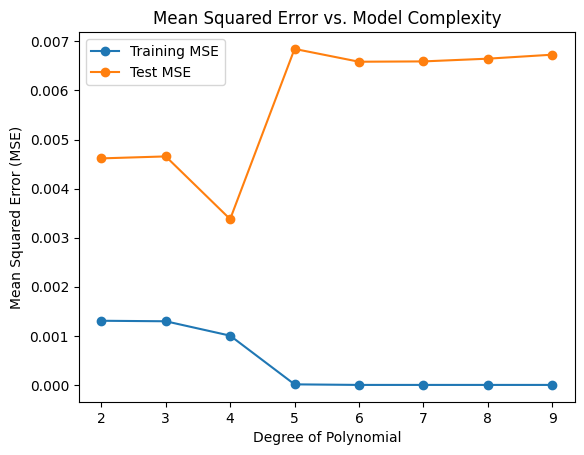

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:10], Y[:10], test_size=3, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


Training data size= 50
Test data size= 21

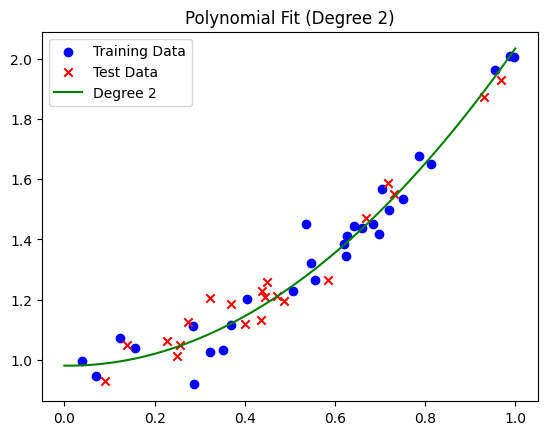

Degree 2 - Training MSE: 0.0033278923838843547, Test MSE: 0.0025806649889053134


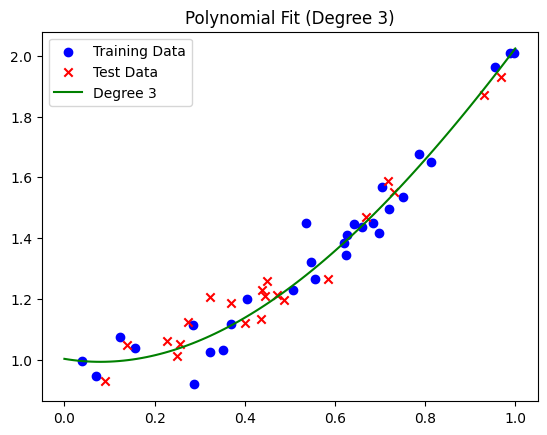

Degree 3 - Training MSE: 0.0032861832148679327, Test MSE: 0.0028113332829589085


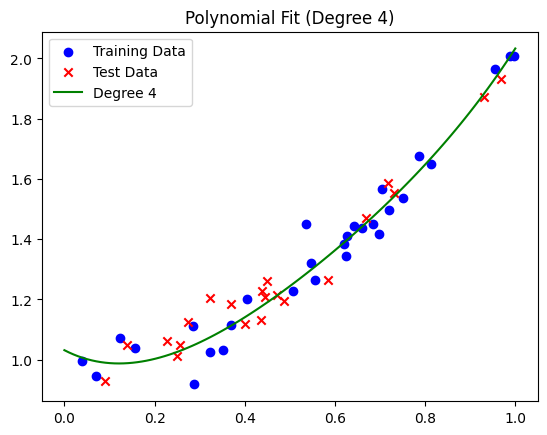

Degree 4 - Training MSE: 0.003247286354137143, Test MSE: 0.002993936554160338


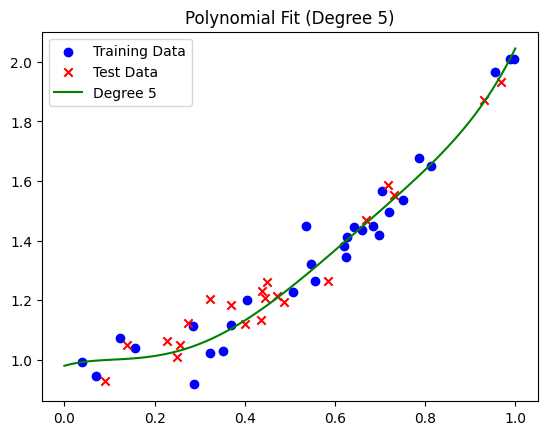

Degree 5 - Training MSE: 0.0031933660063964866, Test MSE: 0.003125850520810026


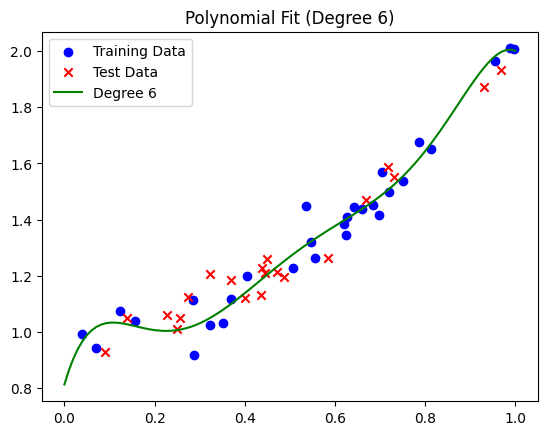

Degree 6 - Training MSE: 0.0027523833934616957, Test MSE: 0.004577168232290941


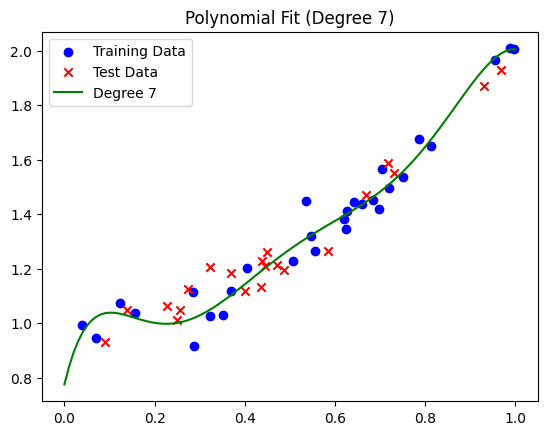

Degree 7 - Training MSE: 0.0027438622063297065, Test MSE: 0.0046621399484234865


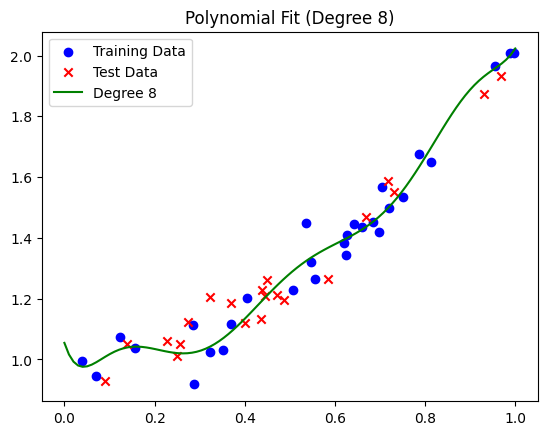

Degree 8 - Training MSE: 0.0025890066826428177, Test MSE: 0.004432246758099771


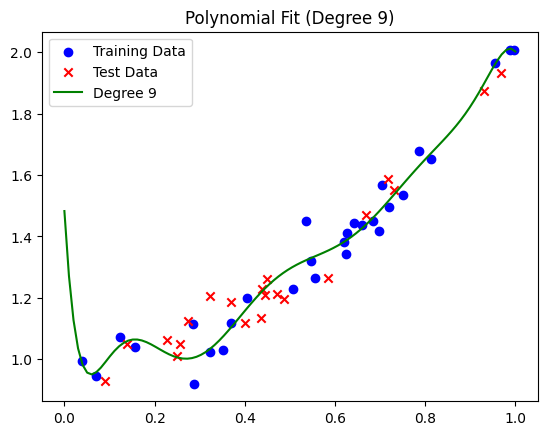

Degree 9 - Training MSE: 0.0023827155398220383, Test MSE: 0.004626799121886575
Coefficient [array([ 1.07217265, -0.01765263,  0.98037116]), array([-0.32827593,  1.59911254, -0.24868589,  1.00216209]), array([ 1.57851212, -3.61705204,  3.81580806, -0.77578733,  1.03158672]), array([  7.71709934, -18.35312289,  14.93703392,  -3.67268472,
         0.43572195,   0.98041919]), array([ -88.93892863,  277.08969577, -329.46795655,  185.85290491,
        -48.87850432,    5.5294766 ,    0.81359978]), array([  53.36581695, -282.9715313 ,  558.61718436, -536.87851514,
        267.34422767,  -65.2153839 ,    6.96943655,    0.77461229]), array([ 9.07593345e+02, -3.75484380e+03,  6.30436427e+03, -5.50275221e+03,
        2.65417628e+03, -6.93069446e+02,  9.01192513e+01, -4.61902114e+00,
        1.05459133e+00]), array([-4.85685545e+03,  2.33967985e+04, -4.75548022e+04,  5.29466801e+04,
       -3.50618240e+04,  1.40267439e+04, -3.29125700e+03,  4.19861856e+02,
       -2.48259545e+01,  1.48259160e+00])]

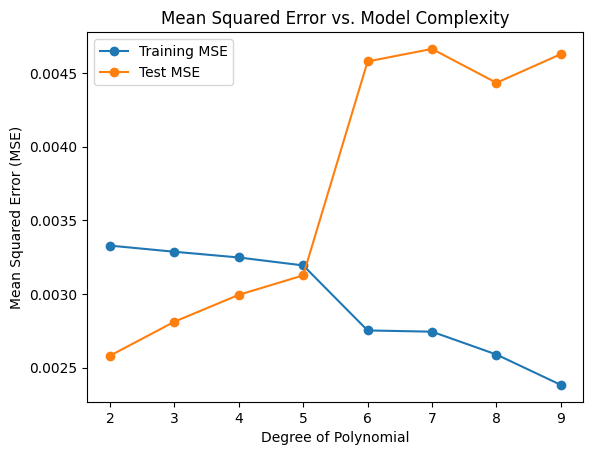

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:50], Y[:50], test_size=21, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


Training data size = 100
Test data size = 43

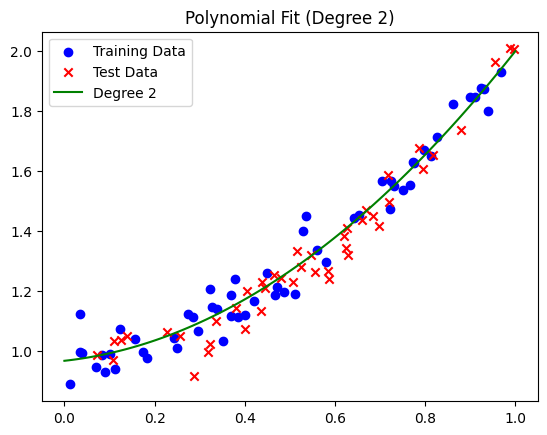

Degree 2 - Training MSE: 0.002956621867565719, Test MSE: 0.003267373437949597


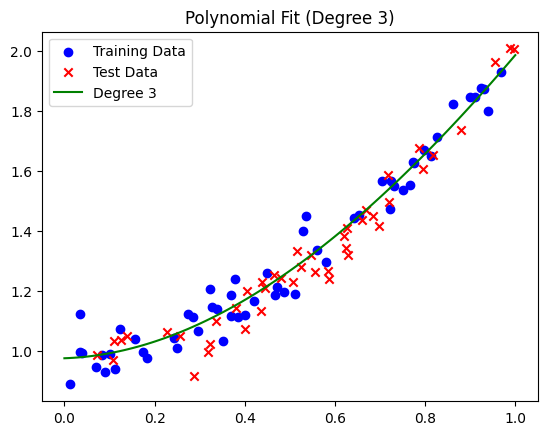

Degree 3 - Training MSE: 0.002943731748609317, Test MSE: 0.003350712101154811


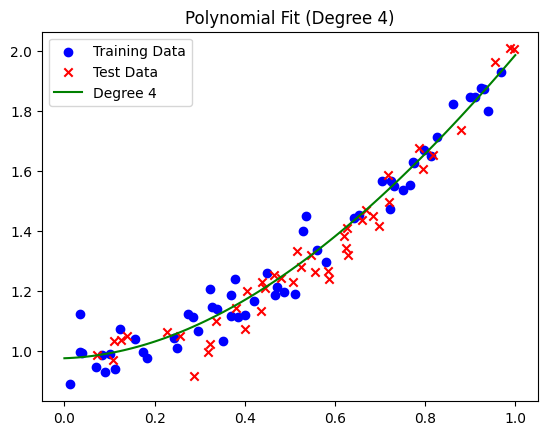

Degree 4 - Training MSE: 0.0029437316531572204, Test MSE: 0.0033506960977532445


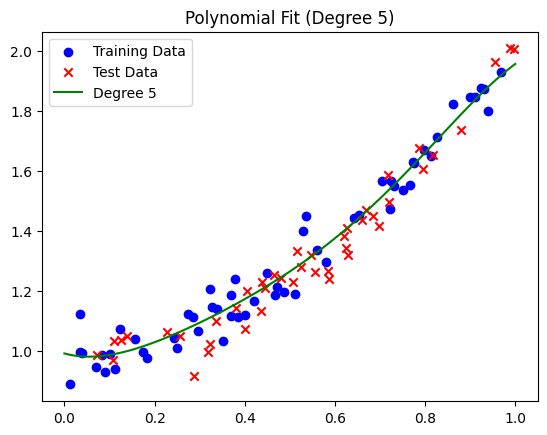

Degree 5 - Training MSE: 0.0029254038672344115, Test MSE: 0.0034537362568482976


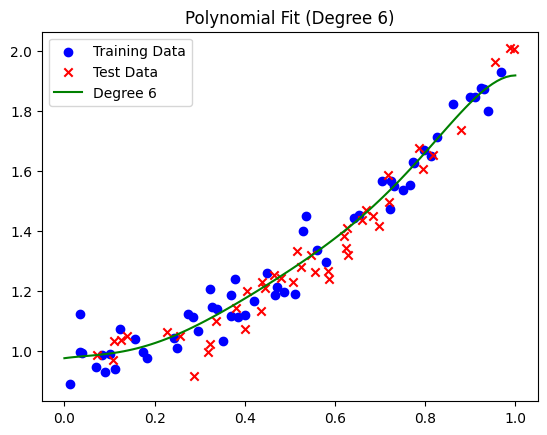

Degree 6 - Training MSE: 0.0029102990517874657, Test MSE: 0.0036288428270448672


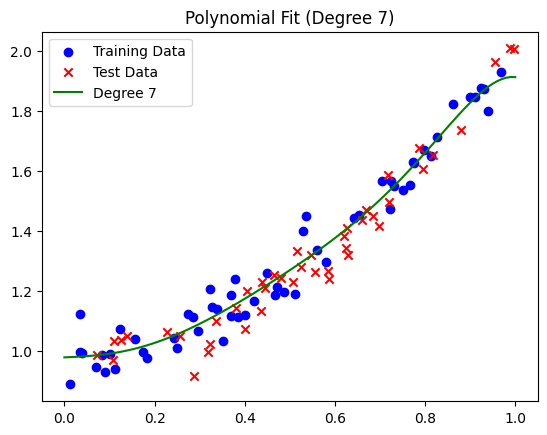

Degree 7 - Training MSE: 0.0029100376529818247, Test MSE: 0.003681097954782414


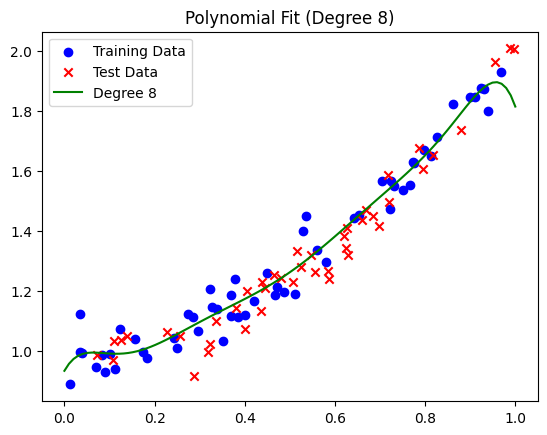

Degree 8 - Training MSE: 0.002863571393594675, Test MSE: 0.004858570974014824


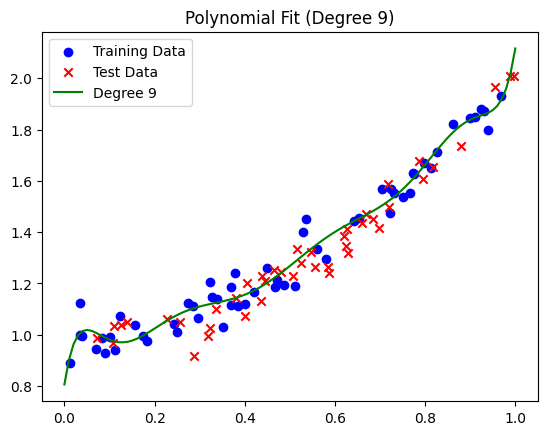

Degree 9 - Training MSE: 0.0026127799049411233, Test MSE: 0.004558962702587002
Coefficient [array([0.86753315, 0.1649134 , 0.96720573]), array([-0.20558007,  1.16297413,  0.05348709,  0.97568106]), array([ 0.00235511, -0.2102385 ,  1.16594479,  0.05283206,  0.97571262]), array([-4.37077738, 10.59890173, -9.33611301,  4.48825951, -0.41474291,
        0.99169437]), array([-15.65545201,  41.11307059, -39.46832795,  16.55686352,
        -1.80832149,   0.205155  ,   0.97586265]), array([-8.56930909e+00,  1.39672195e+01,  5.27180517e-01, -1.15150983e+01,
        6.44283390e+00,  1.34390029e-02,  6.82367026e-02,  9.78629272e-01]), array([-4.70919934e+02,  1.84341571e+03, -2.96385293e+03,  2.51899979e+03,
       -1.21133169e+03,  3.26057788e+02, -4.42111901e+01,  2.72374937e+00,
        9.33786701e-01]), array([ 4.54873816e+03, -2.06051275e+04,  3.91696949e+04, -4.05634844e+04,
        2.48486231e+04, -9.14605328e+03,  1.96118711e+03, -2.23809376e+02,
        1.15407217e+01,  8.06414449e-01])]

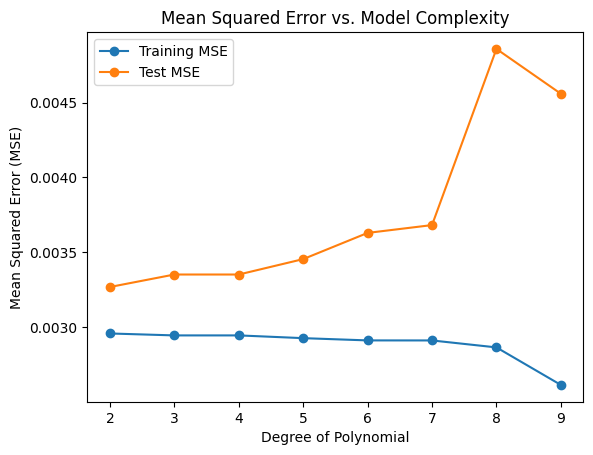

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:100], Y[:100], test_size=43, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


Complete training set

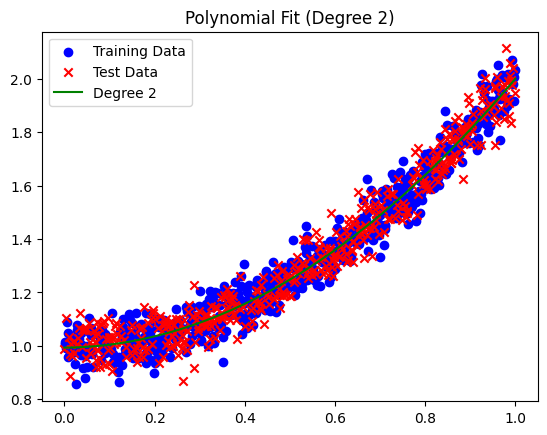

Degree 2 - Training MSE: 0.003232793308696816, Test MSE: 0.0033717423103774547


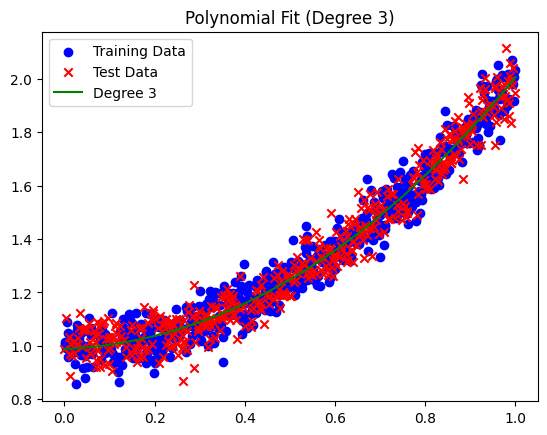

Degree 3 - Training MSE: 0.003229052245964583, Test MSE: 0.0033922105661423493


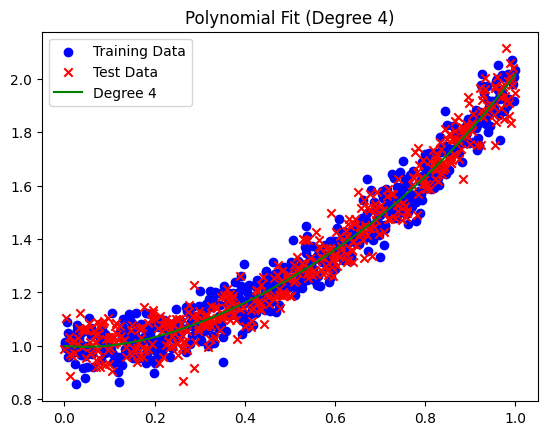

Degree 4 - Training MSE: 0.0032137260296071822, Test MSE: 0.003408473435437071


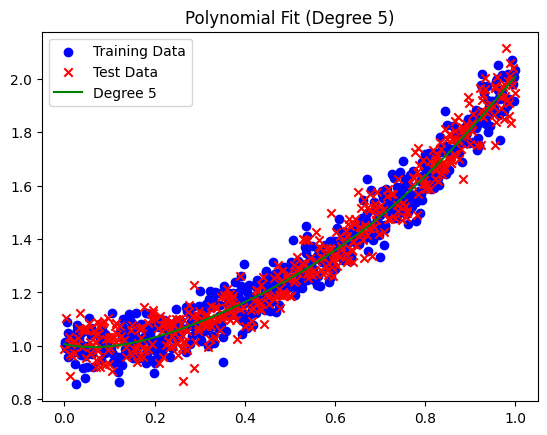

Degree 5 - Training MSE: 0.003208762108163904, Test MSE: 0.0034124486349036026


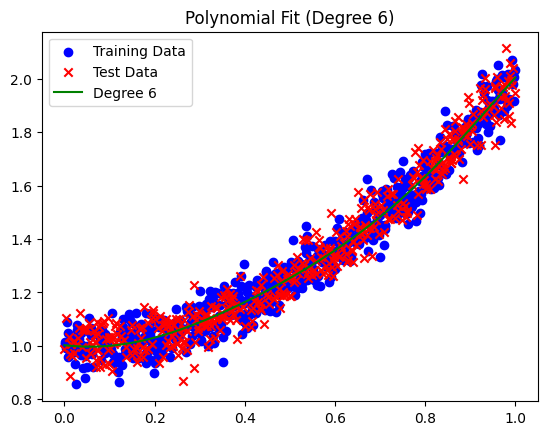

Degree 6 - Training MSE: 0.003207306975233134, Test MSE: 0.0033983715771877783


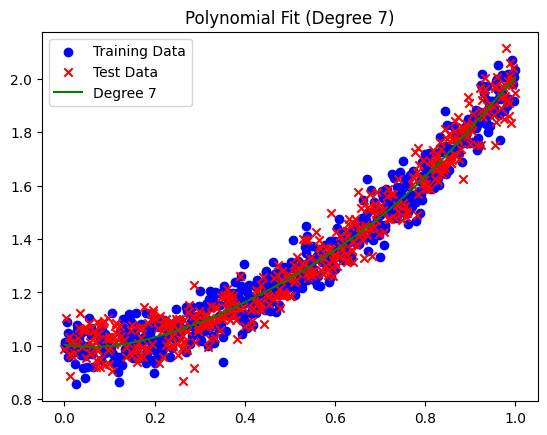

Degree 7 - Training MSE: 0.0032067639889868152, Test MSE: 0.0033964215804464927


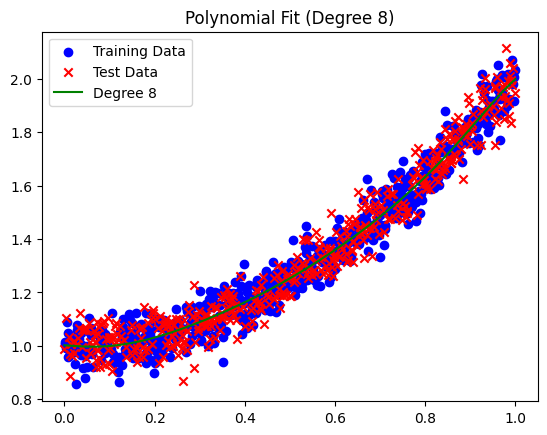

Degree 8 - Training MSE: 0.0032061778118969183, Test MSE: 0.003393758385274088


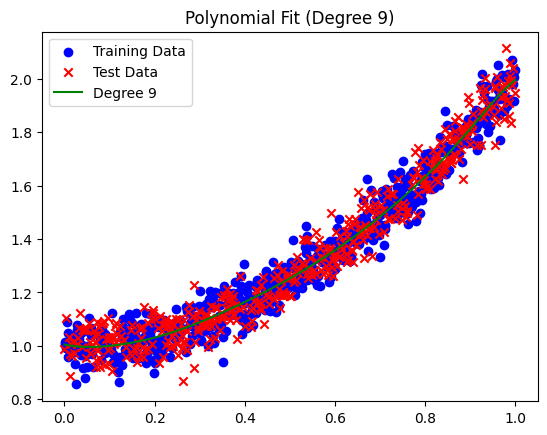

Degree 9 - Training MSE: 0.00320563267113896, Test MSE: 0.0033966452891119577
Coefficient [array([0.99389346, 0.01268678, 0.99315519]), array([0.10241474, 0.84064217, 0.07381678, 0.98808345]), array([ 0.81726045, -1.53071993,  1.88960419, -0.1589463 ,  0.99960774]), array([-1.88823069,  5.49996716, -5.65015833,  3.41289728, -0.37208259,
        1.00641619]), array([-4.01111527, 10.13738121, -8.16146382,  1.63343977,  1.5959014 ,
       -0.19234618,  1.00235429]), array([ -9.68480881,  29.95280913, -36.99391543,  24.64932086,
       -10.32996072,   3.75473909,  -0.35196777,   1.00507634]), array([-4.00167261e+01,  1.50282703e+02, -2.31075032e+02,  1.86436195e+02,
       -8.25681318e+01,  1.81896453e+01, -1.20623660e-01, -1.31931924e-01,
        1.00215239e+00]), array([-1.52067201e+02,  6.43685176e+02, -1.13508620e+03,  1.07877011e+03,
       -5.97488984e+02,  1.96353878e+02, -3.86889892e+01,  5.91392014e+00,
       -4.01415981e-01,  1.00498917e+00])]


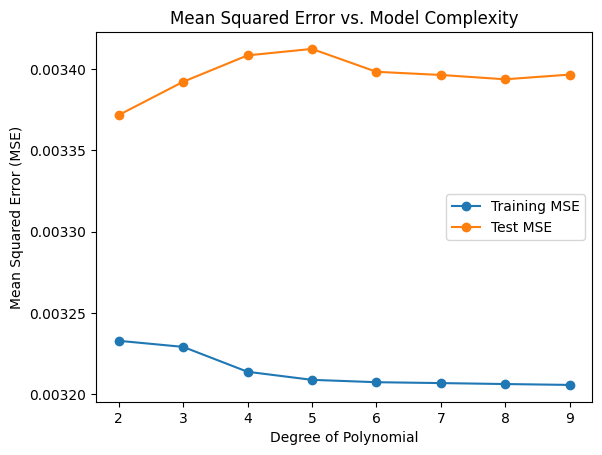

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=429, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


# With regularisation

## No. of training set data=10

alpha=0.01

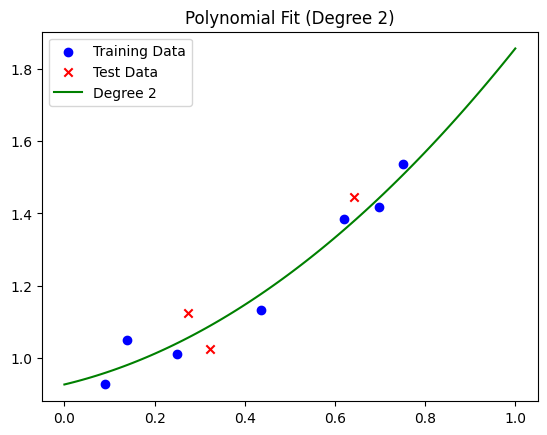

Degree 2 - Training MSE: 0.0015085058274946505, Test MSE: 0.004347611573912822


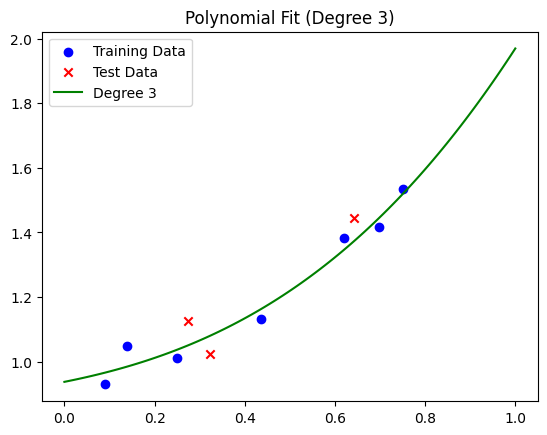

Degree 3 - Training MSE: 0.0013322028254297634, Test MSE: 0.004531401990776352


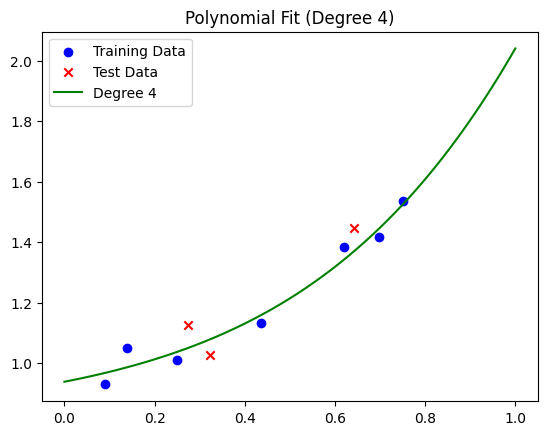

Degree 4 - Training MSE: 0.0013184648179535876, Test MSE: 0.004659358887111969


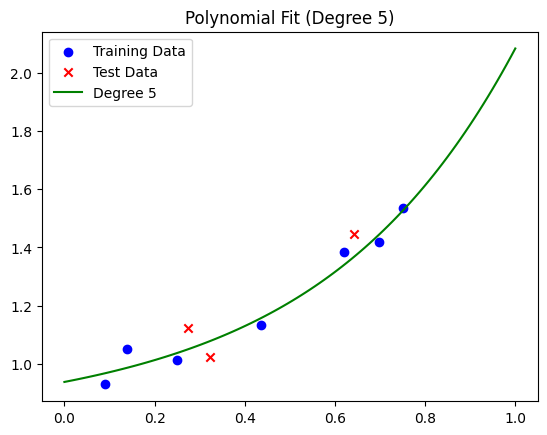

Degree 5 - Training MSE: 0.0013241135739313528, Test MSE: 0.004727979641760748


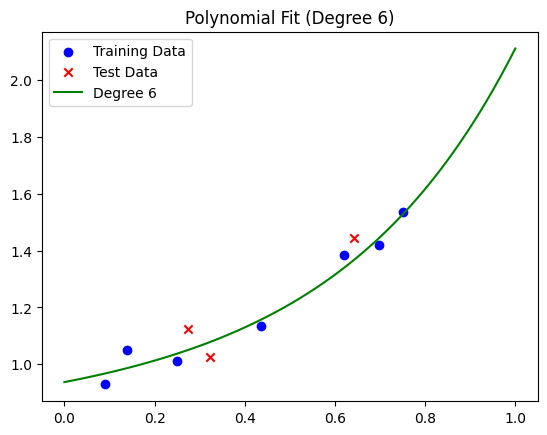

Degree 6 - Training MSE: 0.001328945848053084, Test MSE: 0.004761403492048426


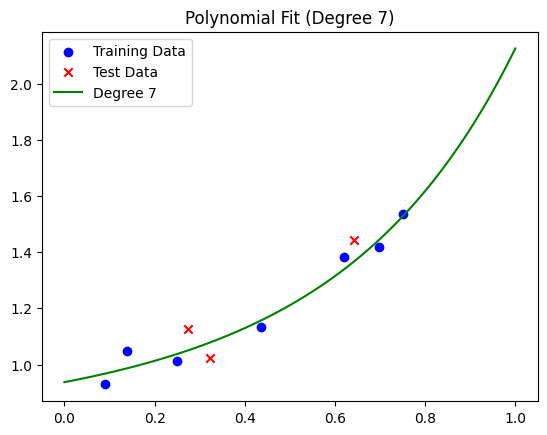

Degree 7 - Training MSE: 0.0013313450380532238, Test MSE: 0.004776022364994495


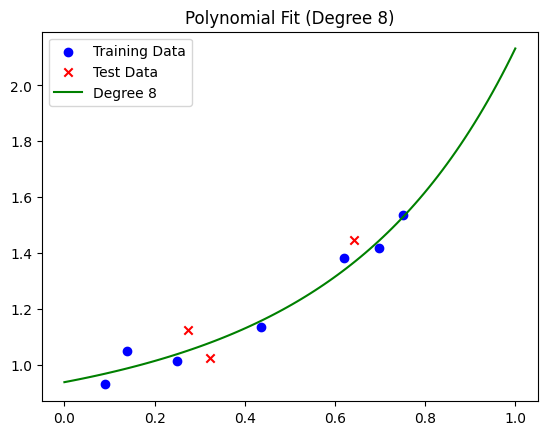

Degree 8 - Training MSE: 0.0013322784630086712, Test MSE: 0.004781619441291186


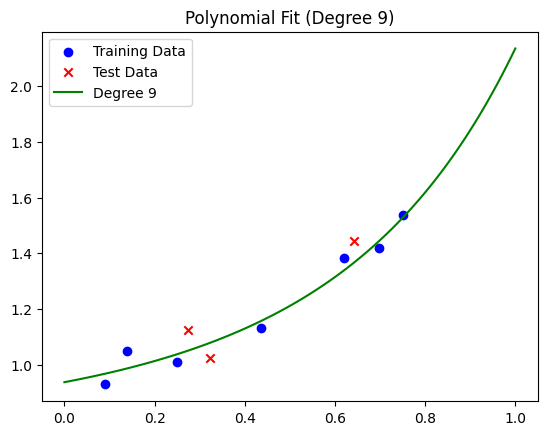

Degree 9 - Training MSE: 0.0013325594625026597, Test MSE: 0.004783354847778625
Coefficient [array([ 9.96315024e-01, -8.78413122e-04,  9.64736230e-01]), array([0.48063487, 0.39088594, 0.21157224, 0.94675377]), array([-14.16773321,  24.48740925, -13.20605399,   3.10726207,
         0.76434625]), array([ 1.92668427e+02, -4.23725643e+02,  3.43876571e+02, -1.24381557e+02,
        1.97824141e+01, -6.94627101e-02]), array([ 9.63260372e+01, -4.52447856e+01, -1.95335534e+02,  2.36322930e+02,
       -9.86060209e+01,  1.68564120e+01,  5.13242127e-02]), array([-4.47550771e+01,  2.29875187e+02, -2.06106303e+02, -9.52384195e+01,
        2.02110738e+02, -9.22922193e+01,  1.62817506e+01,  7.11563000e-02]), array([-1.48491937e+02,  3.07940460e+02, -3.40771521e+01, -1.98933372e+02,
       -6.55607787e+00,  1.53951193e+02, -8.14451176e+01,  1.51867460e+01,
        1.11216738e-01]), array([-2.38239577e+02,  3.10906609e+02,  1.11874531e+02, -1.35859687e+02,
       -1.42997654e+02,  3.66887859e+01,  1.17367

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


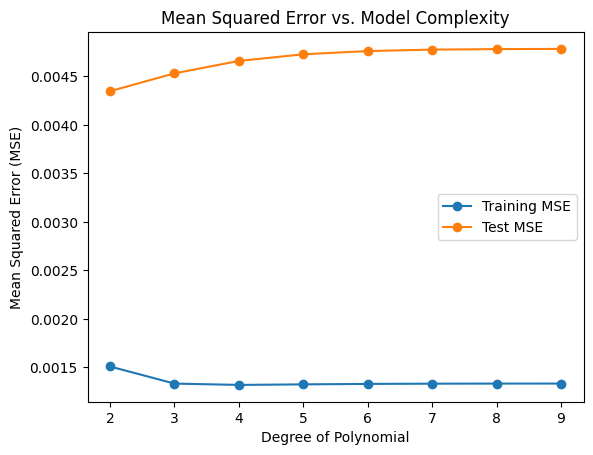

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:10], Y[:10], test_size=3, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.01))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


alpha = 0.05

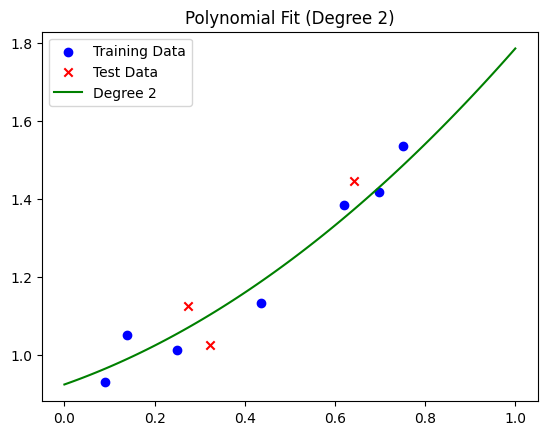

Degree 2 - Training MSE: 0.001876654847873524, Test MSE: 0.004714260034977991


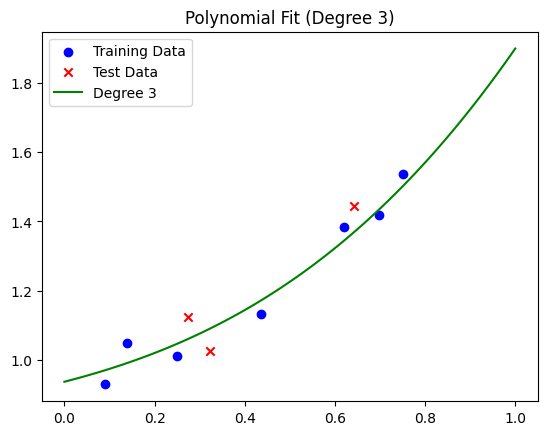

Degree 3 - Training MSE: 0.0015183168456469286, Test MSE: 0.004688196649534799


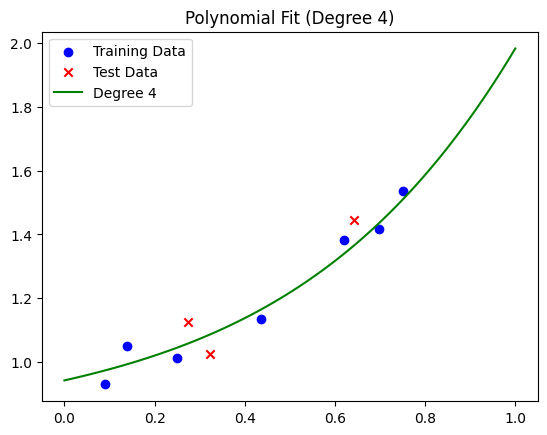

Degree 4 - Training MSE: 0.0014325496074720277, Test MSE: 0.004805439306232903


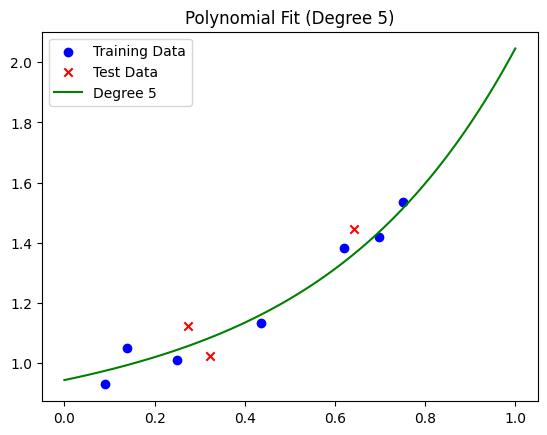

Degree 5 - Training MSE: 0.001416609686048956, Test MSE: 0.0049062484587030705


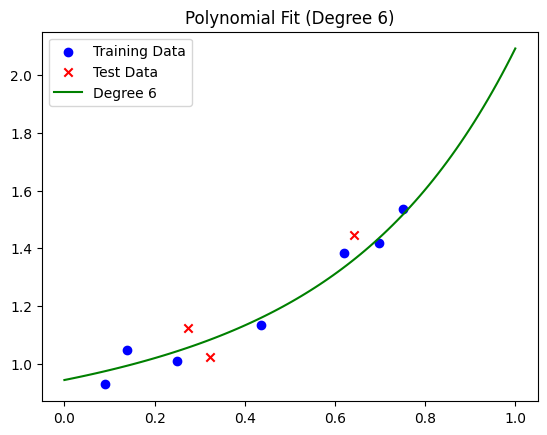

Degree 6 - Training MSE: 0.0014168998764461922, Test MSE: 0.004974428681236835


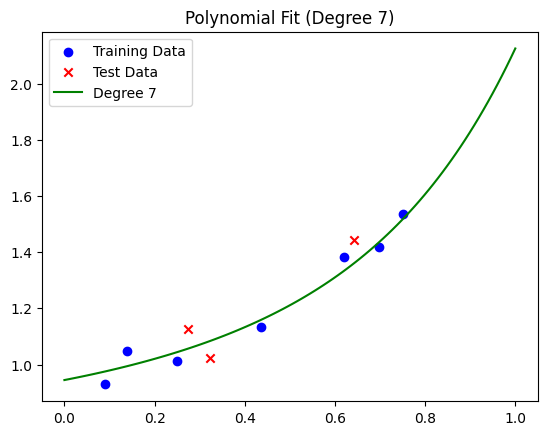

Degree 7 - Training MSE: 0.0014197998093882205, Test MSE: 0.005016947996085974


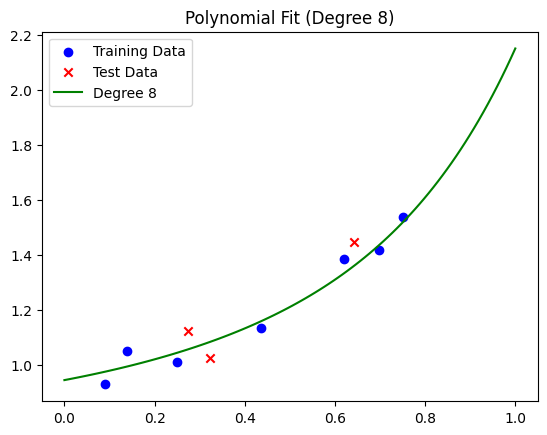

Degree 8 - Training MSE: 0.0014222454461978679, Test MSE: 0.005042443211833118


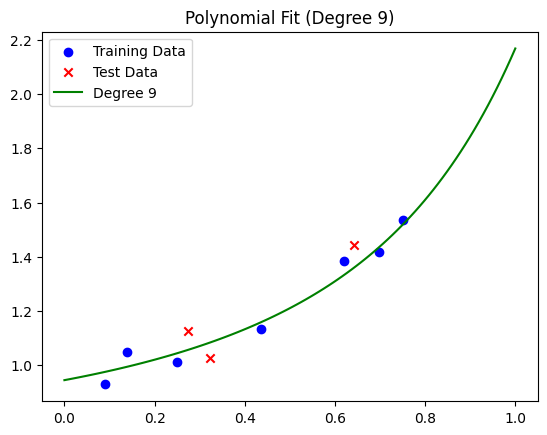

Degree 9 - Training MSE: 0.0014238554654955411, Test MSE: 0.005057407277371573
Coefficient [array([ 9.96315024e-01, -8.78413122e-04,  9.64736230e-01]), array([0.48063487, 0.39088594, 0.21157224, 0.94675377]), array([-14.16773321,  24.48740925, -13.20605399,   3.10726207,
         0.76434625]), array([ 1.92668427e+02, -4.23725643e+02,  3.43876571e+02, -1.24381557e+02,
        1.97824141e+01, -6.94627101e-02]), array([ 9.63260372e+01, -4.52447856e+01, -1.95335534e+02,  2.36322930e+02,
       -9.86060209e+01,  1.68564120e+01,  5.13242127e-02]), array([-4.47550771e+01,  2.29875187e+02, -2.06106303e+02, -9.52384195e+01,
        2.02110738e+02, -9.22922193e+01,  1.62817506e+01,  7.11563000e-02]), array([-1.48491937e+02,  3.07940460e+02, -3.40771521e+01, -1.98933372e+02,
       -6.55607787e+00,  1.53951193e+02, -8.14451176e+01,  1.51867460e+01,
        1.11216738e-01]), array([-2.38239577e+02,  3.10906609e+02,  1.11874531e+02, -1.35859687e+02,
       -1.42997654e+02,  3.66887859e+01,  1.17367

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


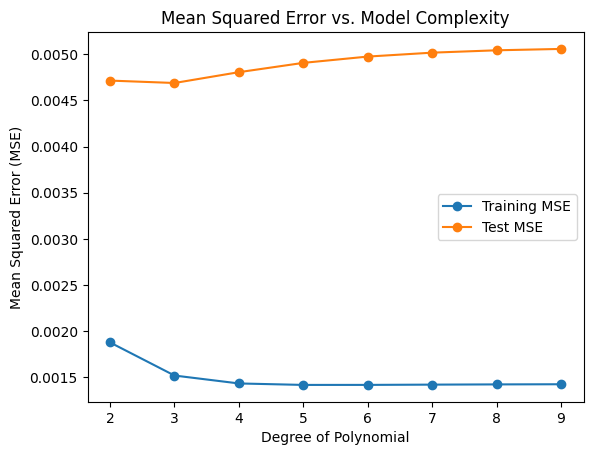

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:10], Y[:10], test_size=3, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.05))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


alpha=0.1

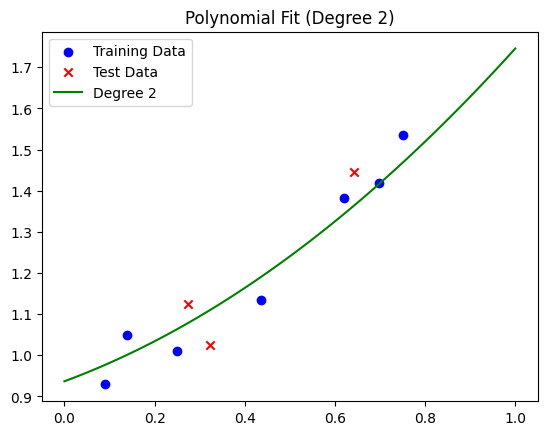

Degree 2 - Training MSE: 0.0023619766168614634, Test MSE: 0.005280669559002751


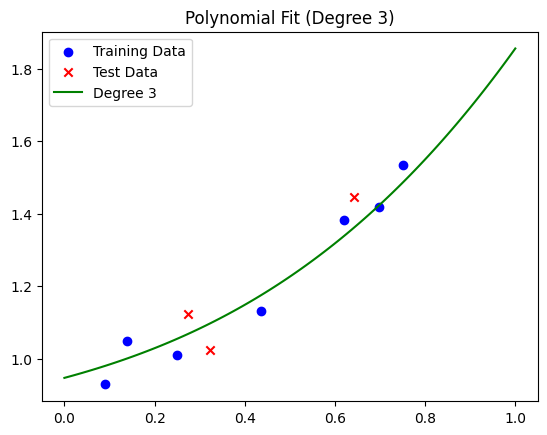

Degree 3 - Training MSE: 0.001851522977971692, Test MSE: 0.005064608310150936


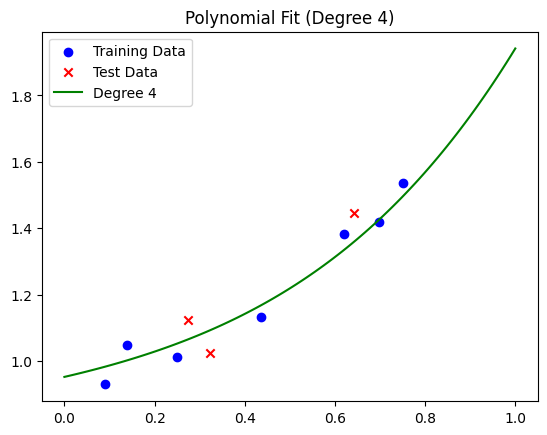

Degree 4 - Training MSE: 0.0017007105523151333, Test MSE: 0.005122121077944136


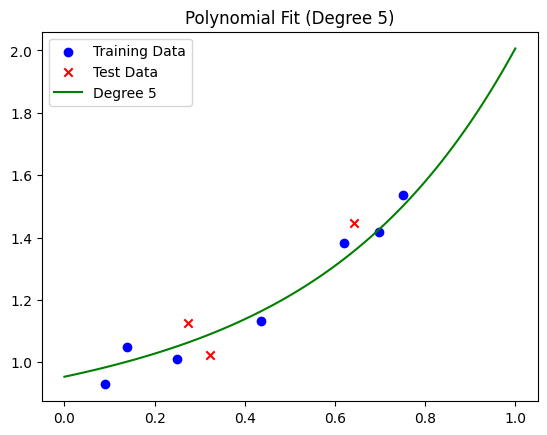

Degree 5 - Training MSE: 0.0016568619983090404, Test MSE: 0.005209880586613629


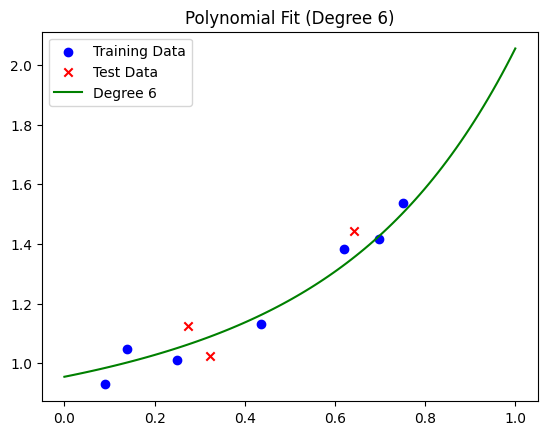

Degree 6 - Training MSE: 0.0016453174625213323, Test MSE: 0.005279784579814528


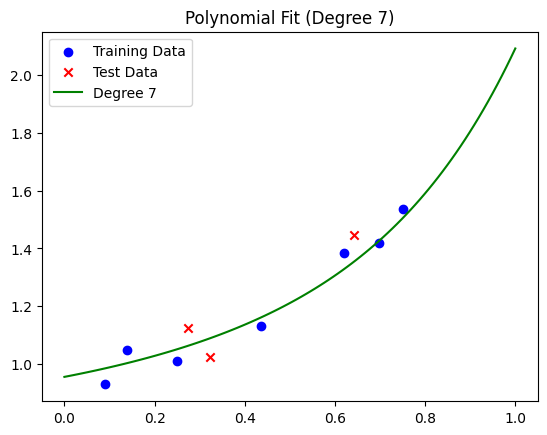

Degree 7 - Training MSE: 0.0016431997158239061, Test MSE: 0.005327425089711422


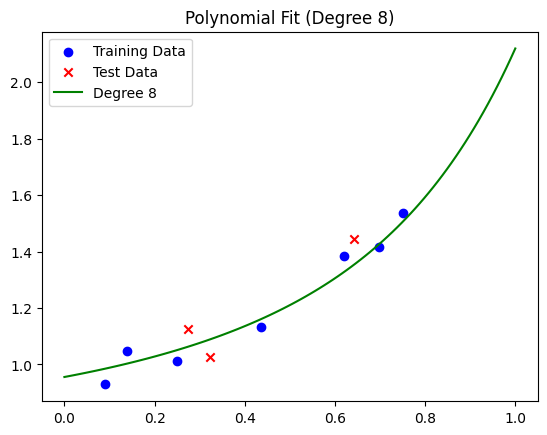

Degree 8 - Training MSE: 0.0016435049196458675, Test MSE: 0.005357729596805864


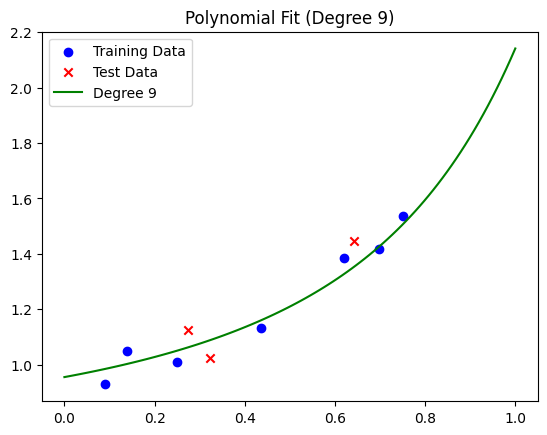

Degree 9 - Training MSE: 0.0016441918441943153, Test MSE: 0.005376287890769014
Coefficient [array([ 9.96315024e-01, -8.78413122e-04,  9.64736230e-01]), array([0.48063487, 0.39088594, 0.21157224, 0.94675377]), array([-14.16773321,  24.48740925, -13.20605399,   3.10726207,
         0.76434625]), array([ 1.92668427e+02, -4.23725643e+02,  3.43876571e+02, -1.24381557e+02,
        1.97824141e+01, -6.94627101e-02]), array([ 9.63260372e+01, -4.52447856e+01, -1.95335534e+02,  2.36322930e+02,
       -9.86060209e+01,  1.68564120e+01,  5.13242127e-02]), array([-4.47550771e+01,  2.29875187e+02, -2.06106303e+02, -9.52384195e+01,
        2.02110738e+02, -9.22922193e+01,  1.62817506e+01,  7.11563000e-02]), array([-1.48491937e+02,  3.07940460e+02, -3.40771521e+01, -1.98933372e+02,
       -6.55607787e+00,  1.53951193e+02, -8.14451176e+01,  1.51867460e+01,
        1.11216738e-01]), array([-2.38239577e+02,  3.10906609e+02,  1.11874531e+02, -1.35859687e+02,
       -1.42997654e+02,  3.66887859e+01,  1.17367

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


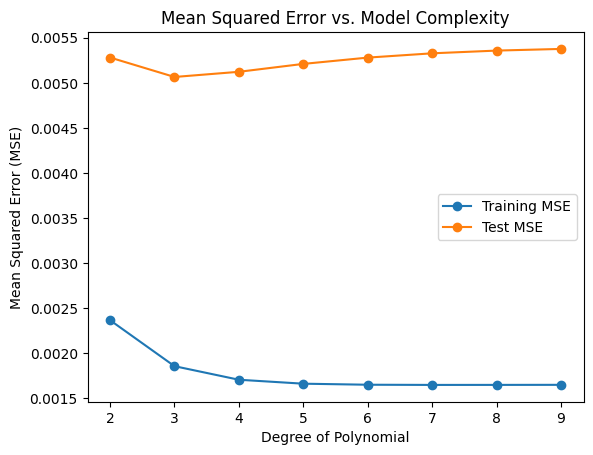

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:10], Y[:10], test_size=3, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


alpha=1

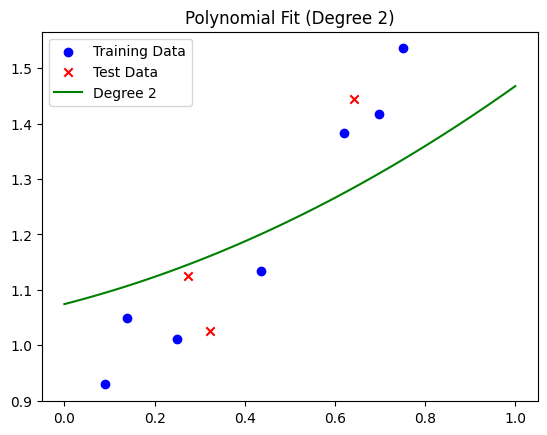

Degree 2 - Training MSE: 0.016400968071166772, Test MSE: 0.014865781011865878


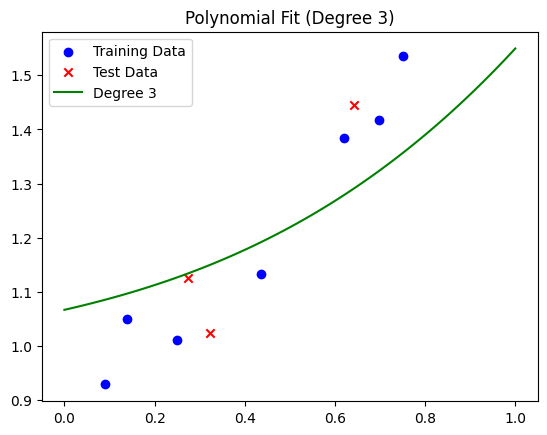

Degree 3 - Training MSE: 0.013603406341338447, Test MSE: 0.0131036218658099


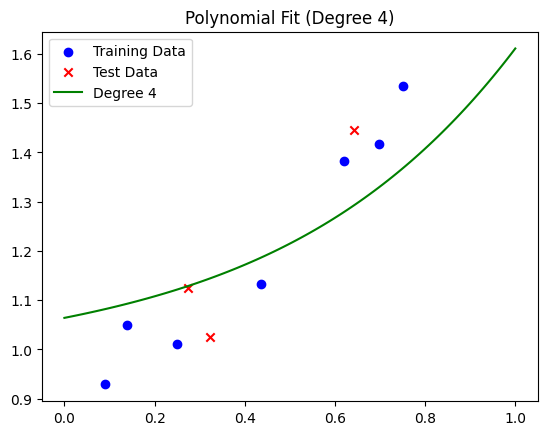

Degree 4 - Training MSE: 0.012417612549370923, Test MSE: 0.01245346198505471


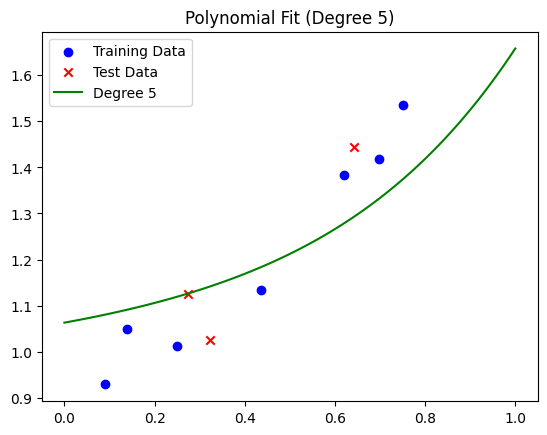

Degree 5 - Training MSE: 0.011870748147224596, Test MSE: 0.012214402978395102


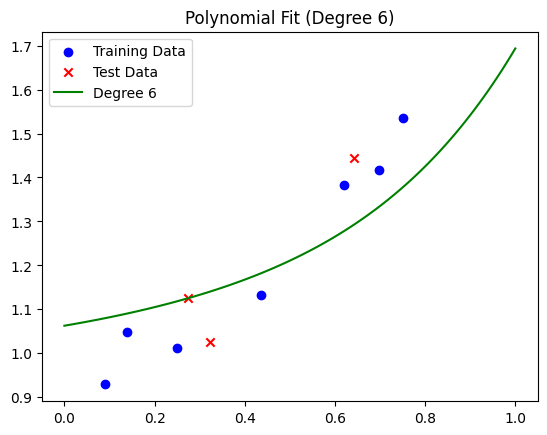

Degree 6 - Training MSE: 0.011605465506057193, Test MSE: 0.012131225621476388


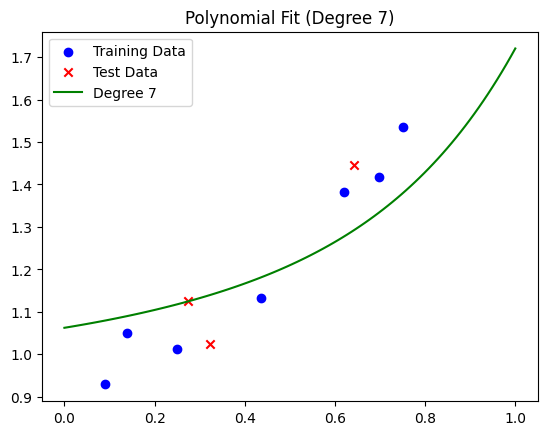

Degree 7 - Training MSE: 0.011472531186041801, Test MSE: 0.012106300946715165


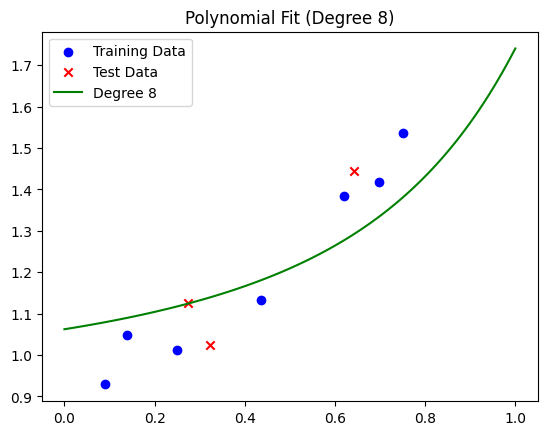

Degree 8 - Training MSE: 0.011404423802976293, Test MSE: 0.012101861707212816


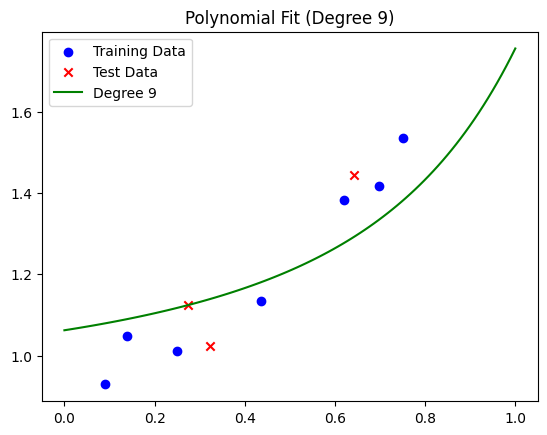

Degree 9 - Training MSE: 0.011368967269673638, Test MSE: 0.012103628161217605
Coefficient [array([ 9.96315024e-01, -8.78413122e-04,  9.64736230e-01]), array([0.48063487, 0.39088594, 0.21157224, 0.94675377]), array([-14.16773321,  24.48740925, -13.20605399,   3.10726207,
         0.76434625]), array([ 1.92668427e+02, -4.23725643e+02,  3.43876571e+02, -1.24381557e+02,
        1.97824141e+01, -6.94627101e-02]), array([ 9.63260372e+01, -4.52447856e+01, -1.95335534e+02,  2.36322930e+02,
       -9.86060209e+01,  1.68564120e+01,  5.13242127e-02]), array([-4.47550771e+01,  2.29875187e+02, -2.06106303e+02, -9.52384195e+01,
        2.02110738e+02, -9.22922193e+01,  1.62817506e+01,  7.11563000e-02]), array([-1.48491937e+02,  3.07940460e+02, -3.40771521e+01, -1.98933372e+02,
       -6.55607787e+00,  1.53951193e+02, -8.14451176e+01,  1.51867460e+01,
        1.11216738e-01]), array([-2.38239577e+02,  3.10906609e+02,  1.11874531e+02, -1.35859687e+02,
       -1.42997654e+02,  3.66887859e+01,  1.173674

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


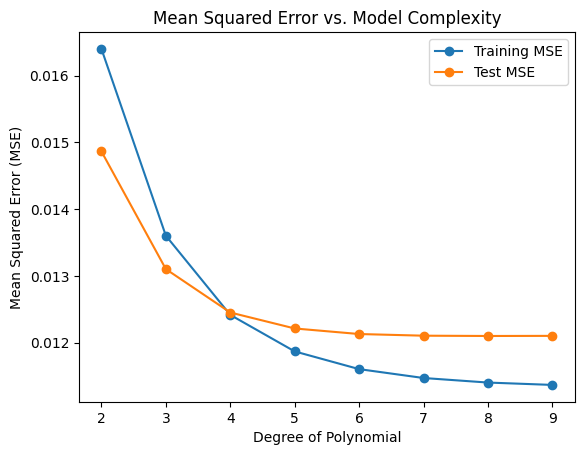

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:10], Y[:10], test_size=3, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


## No of training sets in data = 50, test = 21

### alpha = 0.01



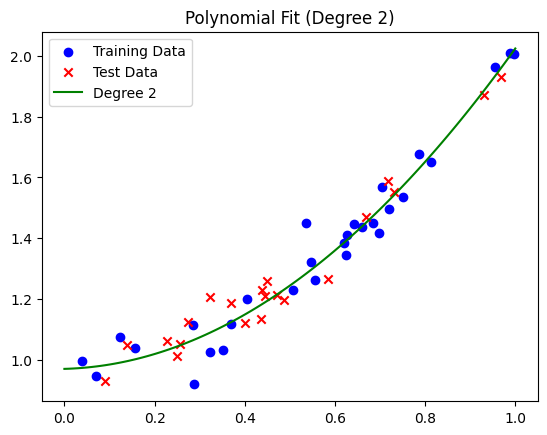

Degree 2 - Training MSE: 0.003347367320714511, Test MSE: 0.002487355526328694


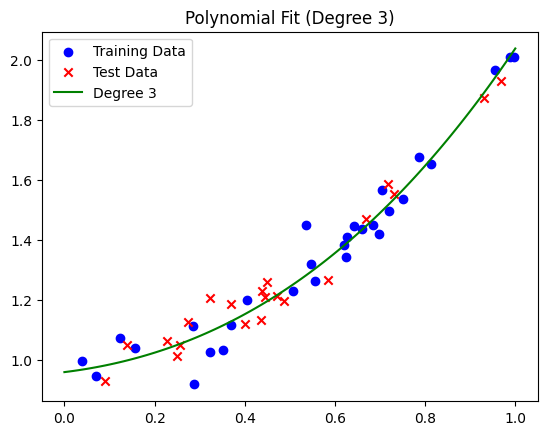

Degree 3 - Training MSE: 0.003420237179300471, Test MSE: 0.002408320169886751


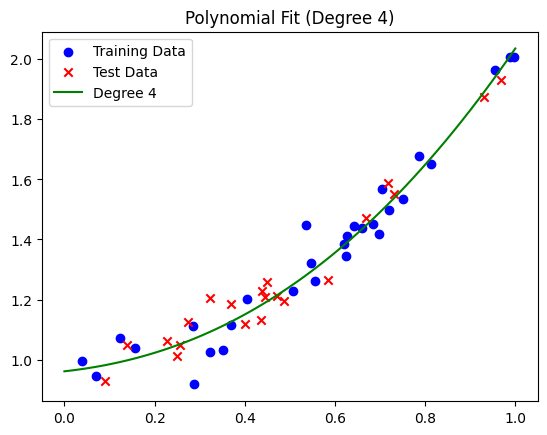

Degree 4 - Training MSE: 0.0033972701984310632, Test MSE: 0.0024267716098802365


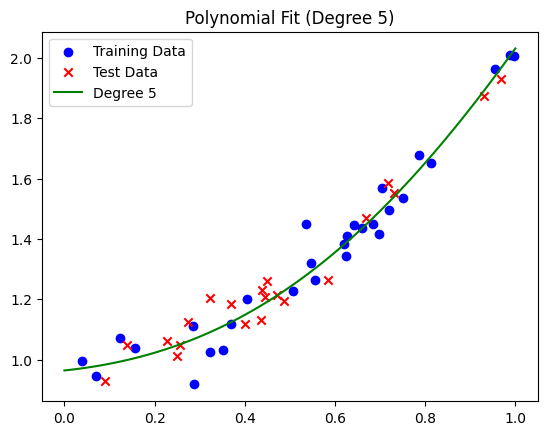

Degree 5 - Training MSE: 0.0033802501222742936, Test MSE: 0.0024479696134792925


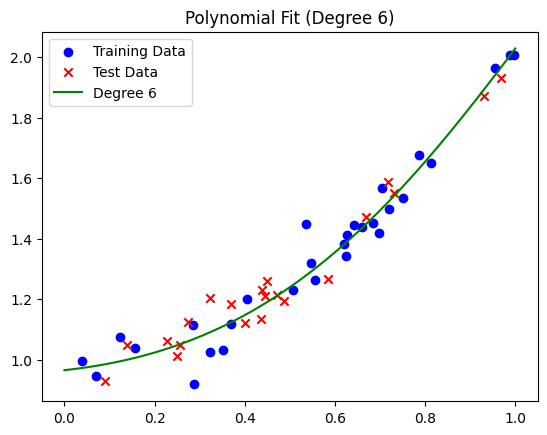

Degree 6 - Training MSE: 0.003381338734834474, Test MSE: 0.002454793527252746


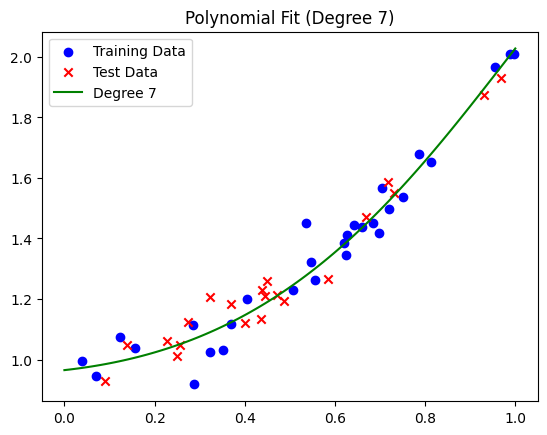

Degree 7 - Training MSE: 0.0033863575808247078, Test MSE: 0.0024548258118728705


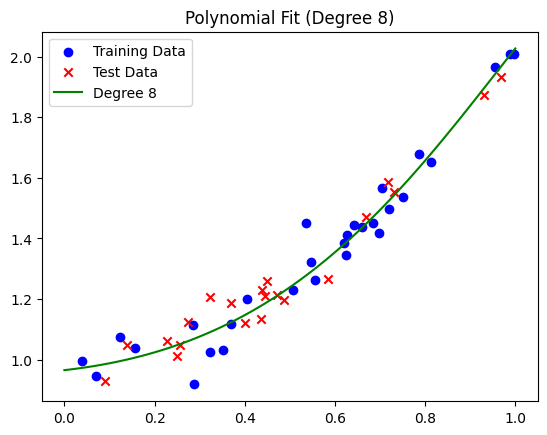

Degree 8 - Training MSE: 0.0033894947493243207, Test MSE: 0.0024539191420127277


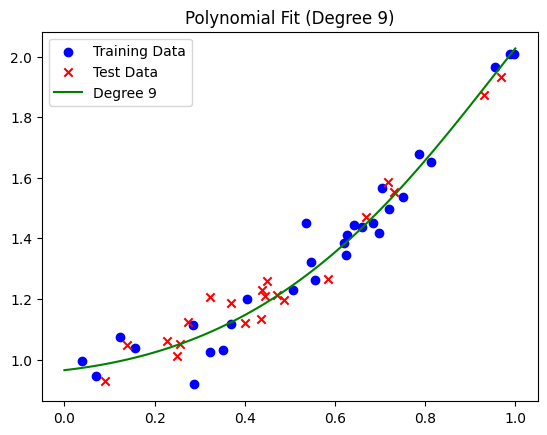

Degree 9 - Training MSE: 0.0033906055312160383, Test MSE: 0.0024535522288334595
Coefficient [array([ 1.07217265, -0.01765263,  0.98037116]), array([-0.32827593,  1.59911254, -0.24868589,  1.00216209]), array([ 1.57851212, -3.61705204,  3.81580806, -0.77578733,  1.03158672]), array([  7.71709934, -18.35312289,  14.93703392,  -3.67268472,
         0.43572195,   0.98041919]), array([ -88.93892863,  277.08969577, -329.46795655,  185.85290491,
        -48.87850432,    5.5294766 ,    0.81359978]), array([  53.36581695, -282.9715313 ,  558.61718436, -536.87851514,
        267.34422767,  -65.2153839 ,    6.96943655,    0.77461229]), array([ 9.07593345e+02, -3.75484380e+03,  6.30436427e+03, -5.50275221e+03,
        2.65417628e+03, -6.93069446e+02,  9.01192513e+01, -4.61902114e+00,
        1.05459133e+00]), array([-4.85685545e+03,  2.33967985e+04, -4.75548022e+04,  5.29466801e+04,
       -3.50618240e+04,  1.40267439e+04, -3.29125700e+03,  4.19861856e+02,
       -2.48259545e+01,  1.48259160e+00])

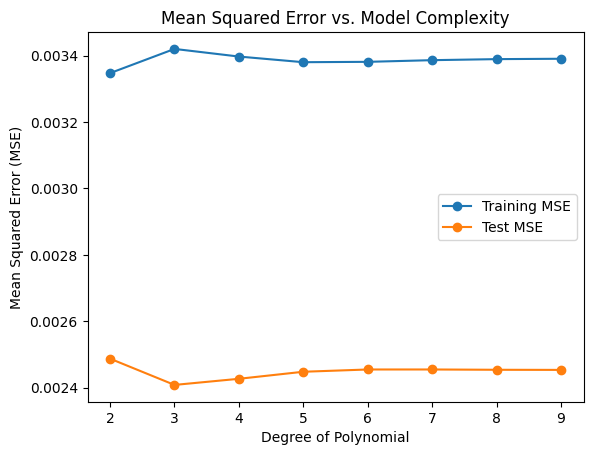

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:50], Y[:50], test_size=21, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.01))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 0.05

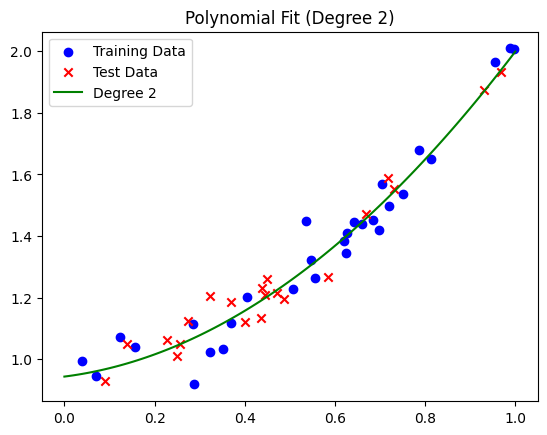

Degree 2 - Training MSE: 0.003566671574547653, Test MSE: 0.0023585560809246038


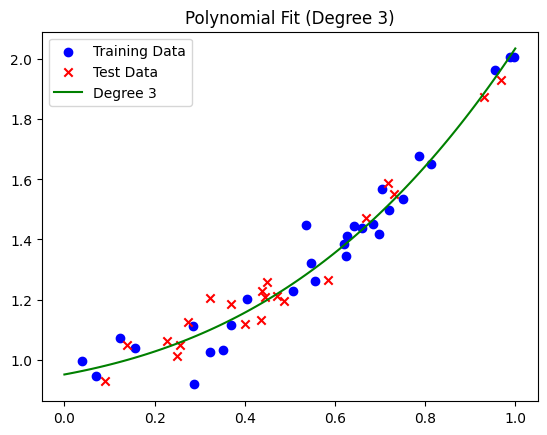

Degree 3 - Training MSE: 0.003486789303044374, Test MSE: 0.002318684410287134


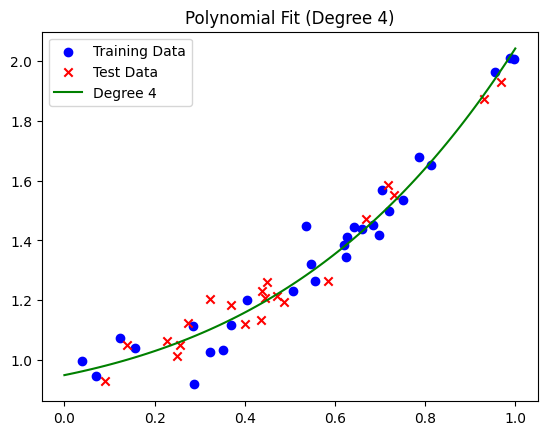

Degree 4 - Training MSE: 0.0035406880372205567, Test MSE: 0.002318594686071363


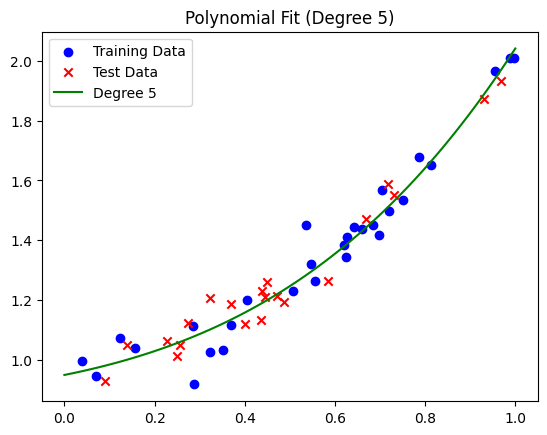

Degree 5 - Training MSE: 0.003529952485717074, Test MSE: 0.0023183958707658644


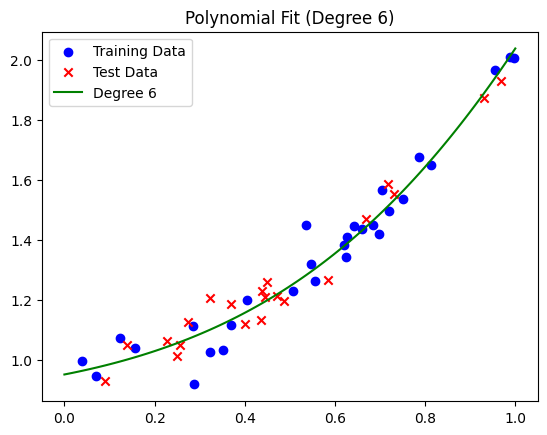

Degree 6 - Training MSE: 0.0035067411973703695, Test MSE: 0.0023179344442190836


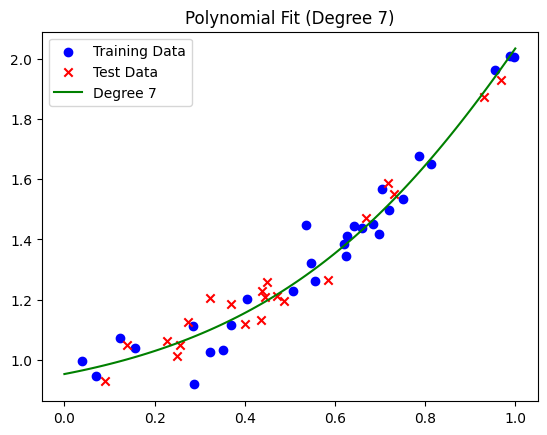

Degree 7 - Training MSE: 0.0034913012068044282, Test MSE: 0.002318086193453978


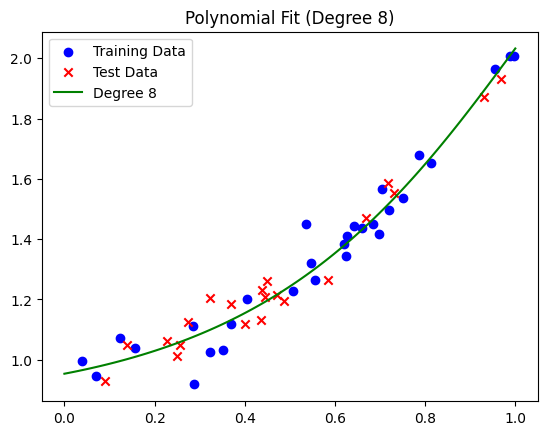

Degree 8 - Training MSE: 0.0034844590990380318, Test MSE: 0.002319240901822204


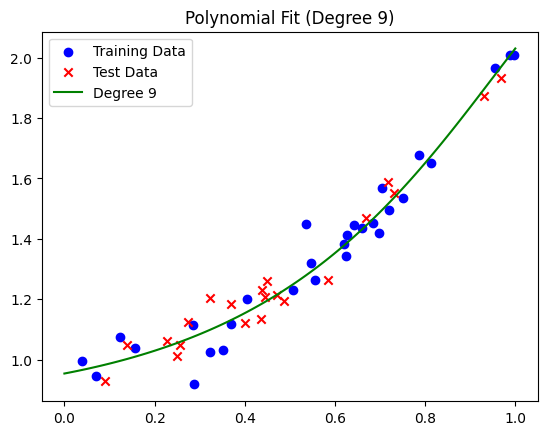

Degree 9 - Training MSE: 0.0034828680692036732, Test MSE: 0.0023215635315763992
Coefficient [array([ 1.07217265, -0.01765263,  0.98037116]), array([-0.32827593,  1.59911254, -0.24868589,  1.00216209]), array([ 1.57851212, -3.61705204,  3.81580806, -0.77578733,  1.03158672]), array([  7.71709934, -18.35312289,  14.93703392,  -3.67268472,
         0.43572195,   0.98041919]), array([ -88.93892863,  277.08969577, -329.46795655,  185.85290491,
        -48.87850432,    5.5294766 ,    0.81359978]), array([  53.36581695, -282.9715313 ,  558.61718436, -536.87851514,
        267.34422767,  -65.2153839 ,    6.96943655,    0.77461229]), array([ 9.07593345e+02, -3.75484380e+03,  6.30436427e+03, -5.50275221e+03,
        2.65417628e+03, -6.93069446e+02,  9.01192513e+01, -4.61902114e+00,
        1.05459133e+00]), array([-4.85685545e+03,  2.33967985e+04, -4.75548022e+04,  5.29466801e+04,
       -3.50618240e+04,  1.40267439e+04, -3.29125700e+03,  4.19861856e+02,
       -2.48259545e+01,  1.48259160e+00])

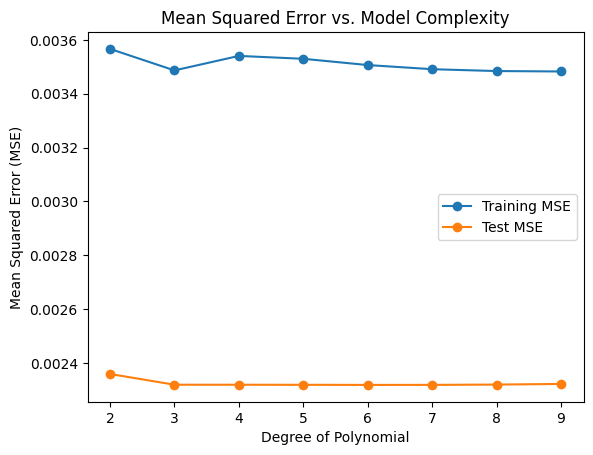

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:50], Y[:50], test_size=21, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.05))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 0.1

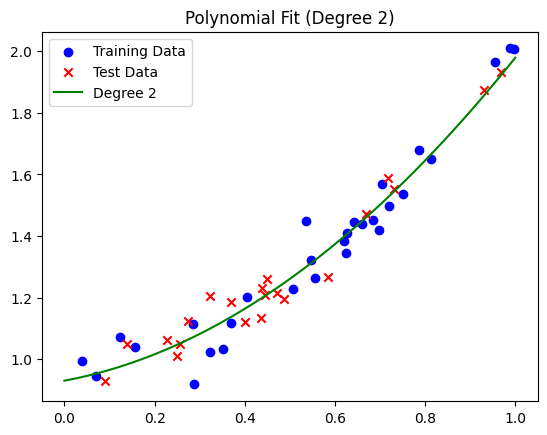

Degree 2 - Training MSE: 0.003847133264508407, Test MSE: 0.002353088096356013


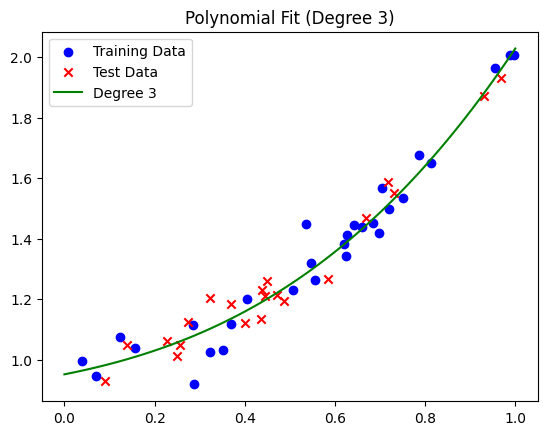

Degree 3 - Training MSE: 0.00351509760624252, Test MSE: 0.0022739379096814983


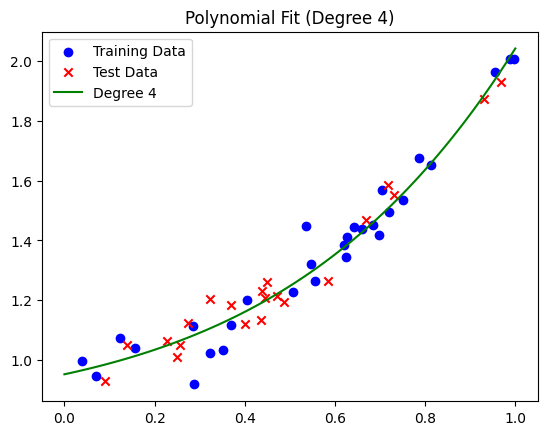

Degree 4 - Training MSE: 0.0035999569462576877, Test MSE: 0.0023024379784943212


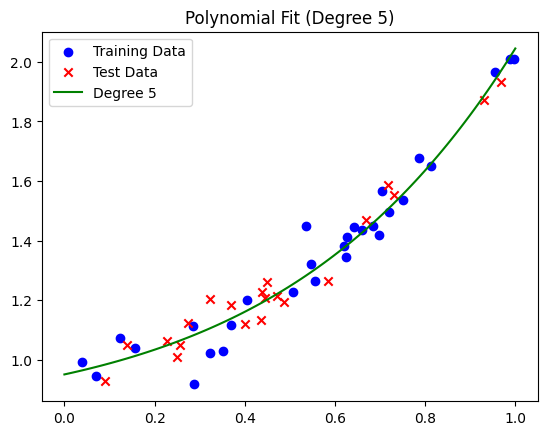

Degree 5 - Training MSE: 0.003618996025977696, Test MSE: 0.0023077788601723694


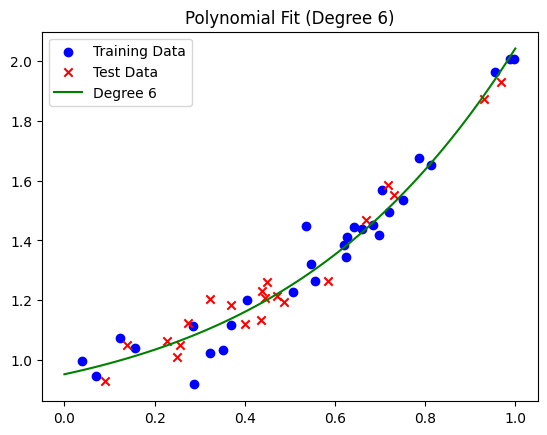

Degree 6 - Training MSE: 0.0036020725167379176, Test MSE: 0.0023030515690651


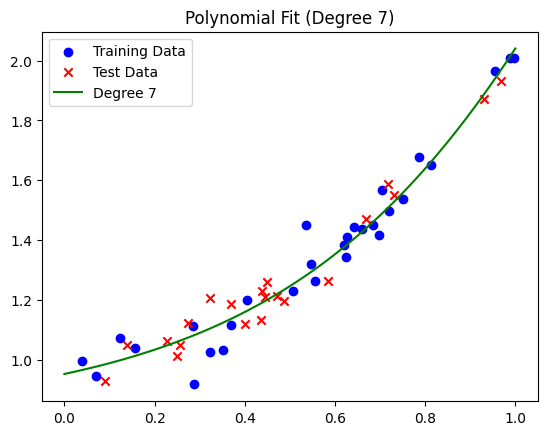

Degree 7 - Training MSE: 0.003580034243530539, Test MSE: 0.0022969617549233635


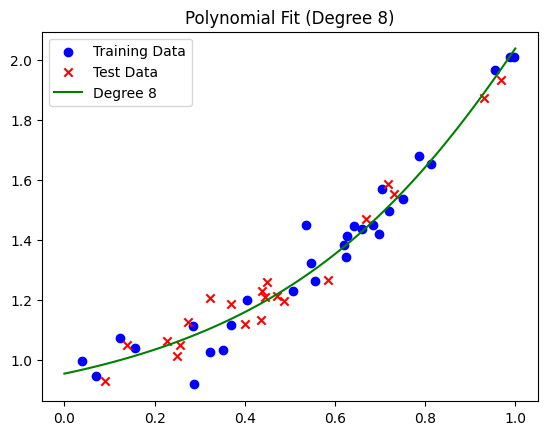

Degree 8 - Training MSE: 0.003563092522205194, Test MSE: 0.0022929086132237445


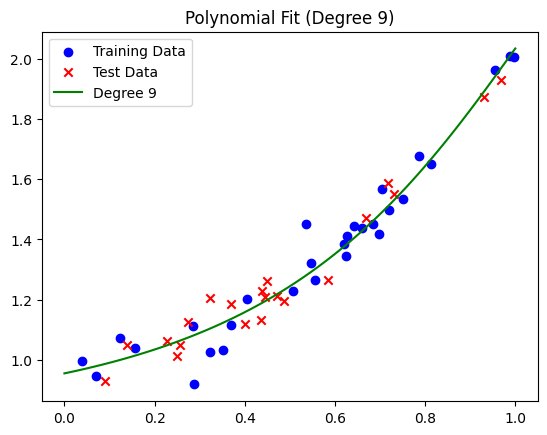

Degree 9 - Training MSE: 0.003552345804094888, Test MSE: 0.002291771415052864
Coefficient [array([ 1.07217265, -0.01765263,  0.98037116]), array([-0.32827593,  1.59911254, -0.24868589,  1.00216209]), array([ 1.57851212, -3.61705204,  3.81580806, -0.77578733,  1.03158672]), array([  7.71709934, -18.35312289,  14.93703392,  -3.67268472,
         0.43572195,   0.98041919]), array([ -88.93892863,  277.08969577, -329.46795655,  185.85290491,
        -48.87850432,    5.5294766 ,    0.81359978]), array([  53.36581695, -282.9715313 ,  558.61718436, -536.87851514,
        267.34422767,  -65.2153839 ,    6.96943655,    0.77461229]), array([ 9.07593345e+02, -3.75484380e+03,  6.30436427e+03, -5.50275221e+03,
        2.65417628e+03, -6.93069446e+02,  9.01192513e+01, -4.61902114e+00,
        1.05459133e+00]), array([-4.85685545e+03,  2.33967985e+04, -4.75548022e+04,  5.29466801e+04,
       -3.50618240e+04,  1.40267439e+04, -3.29125700e+03,  4.19861856e+02,
       -2.48259545e+01,  1.48259160e+00])]


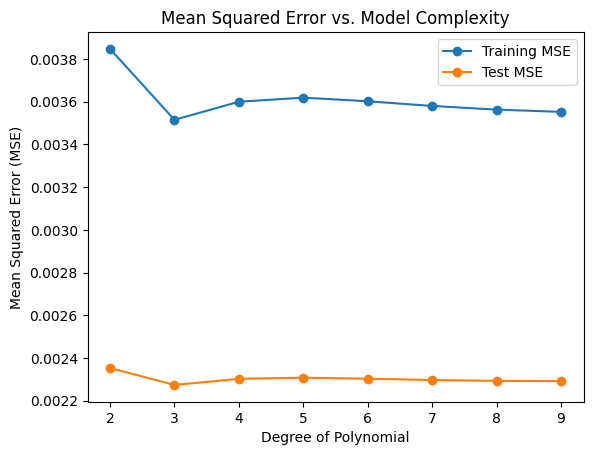

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:50], Y[:50], test_size=21, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 1

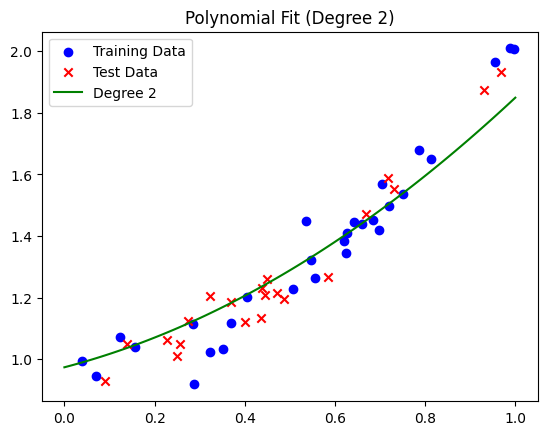

Degree 2 - Training MSE: 0.007851798194893955, Test MSE: 0.0046755978692694725


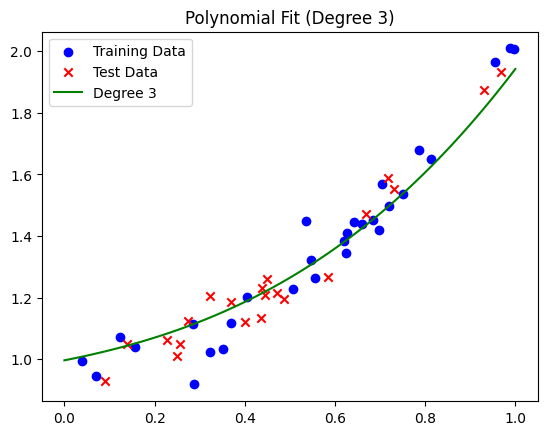

Degree 3 - Training MSE: 0.005185643856525665, Test MSE: 0.003049977848531665


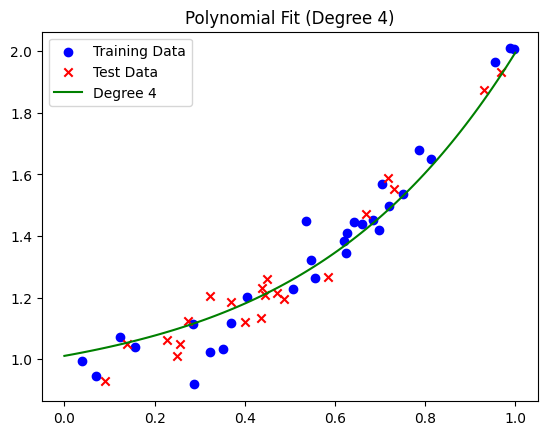

Degree 4 - Training MSE: 0.004882781757423798, Test MSE: 0.002983205600347775


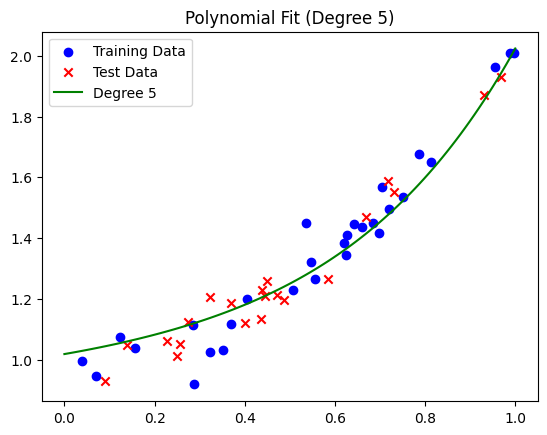

Degree 5 - Training MSE: 0.005107803252947525, Test MSE: 0.0031849232097908107


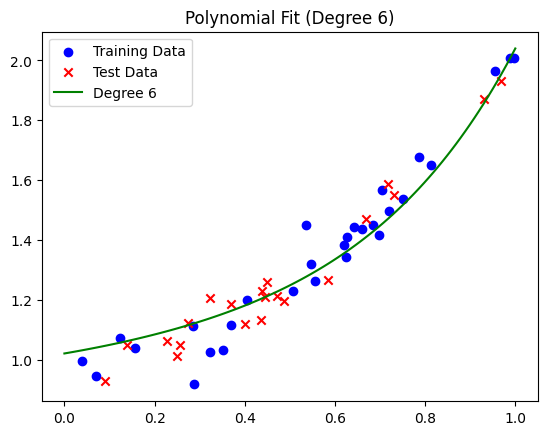

Degree 6 - Training MSE: 0.005345413629589132, Test MSE: 0.003360300401491199


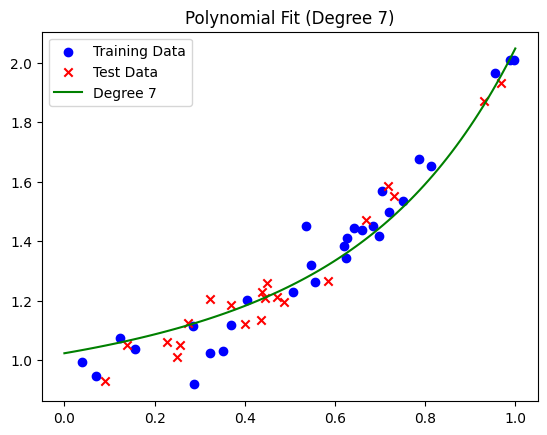

Degree 7 - Training MSE: 0.005500420542083267, Test MSE: 0.0034690591056847154


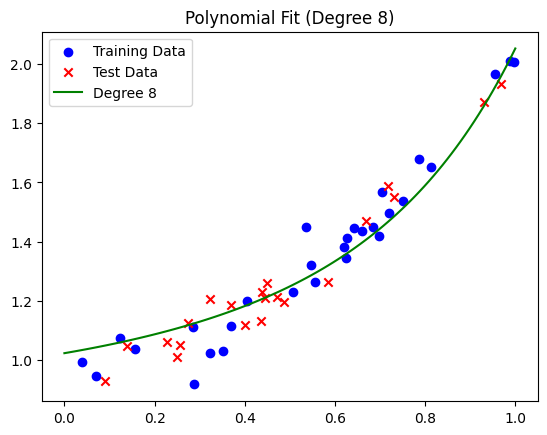

Degree 8 - Training MSE: 0.005582921794735473, Test MSE: 0.003525640371693805


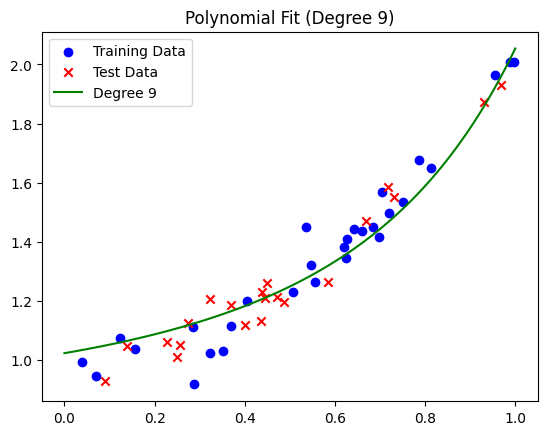

Degree 9 - Training MSE: 0.005617730456016619, Test MSE: 0.0035491300011543975
Coefficient [array([ 1.07217265, -0.01765263,  0.98037116]), array([-0.32827593,  1.59911254, -0.24868589,  1.00216209]), array([ 1.57851212, -3.61705204,  3.81580806, -0.77578733,  1.03158672]), array([  7.71709934, -18.35312289,  14.93703392,  -3.67268472,
         0.43572195,   0.98041919]), array([ -88.93892863,  277.08969577, -329.46795655,  185.85290491,
        -48.87850432,    5.5294766 ,    0.81359978]), array([  53.36581695, -282.9715313 ,  558.61718436, -536.87851514,
        267.34422767,  -65.2153839 ,    6.96943655,    0.77461229]), array([ 9.07593345e+02, -3.75484380e+03,  6.30436427e+03, -5.50275221e+03,
        2.65417628e+03, -6.93069446e+02,  9.01192513e+01, -4.61902114e+00,
        1.05459133e+00]), array([-4.85685545e+03,  2.33967985e+04, -4.75548022e+04,  5.29466801e+04,
       -3.50618240e+04,  1.40267439e+04, -3.29125700e+03,  4.19861856e+02,
       -2.48259545e+01,  1.48259160e+00])]

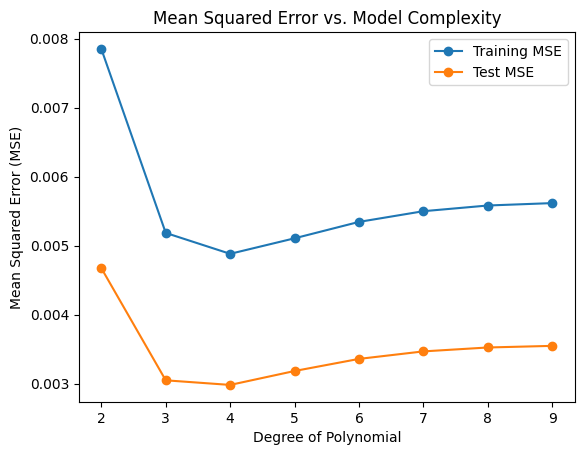

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:50], Y[:50], test_size=21, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


## No. of data in training set = 100, test = 43

### alpha = 0.01

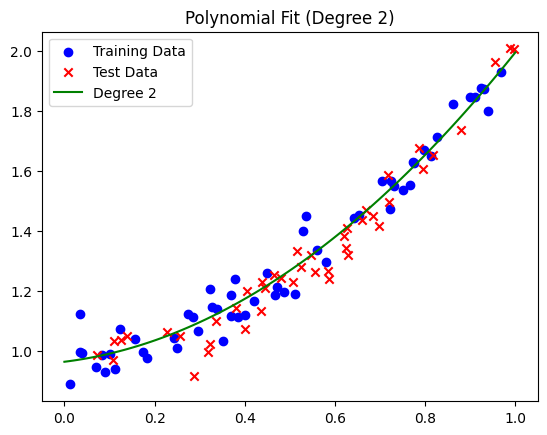

Degree 2 - Training MSE: 0.0029592202688337676, Test MSE: 0.003351275854454166


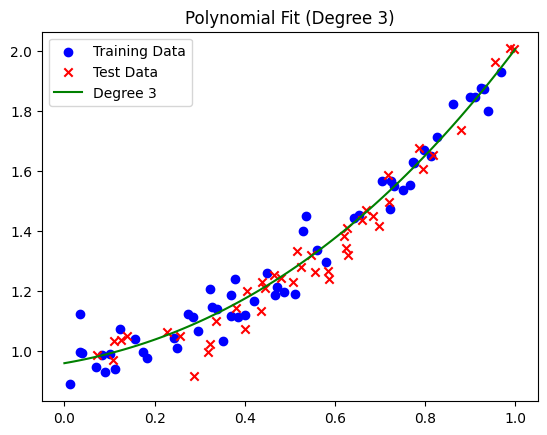

Degree 3 - Training MSE: 0.0029836312065754933, Test MSE: 0.003272173930897193


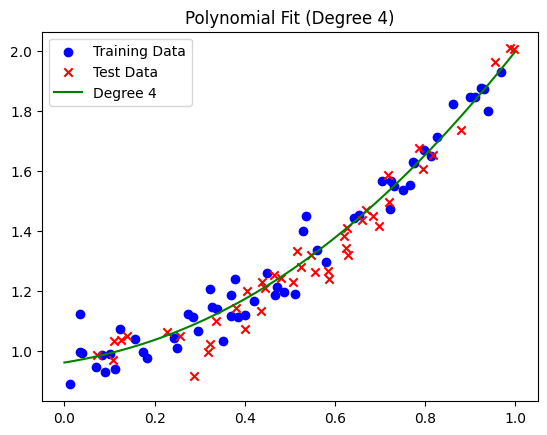

Degree 4 - Training MSE: 0.00296647799575033, Test MSE: 0.0032939590488368815


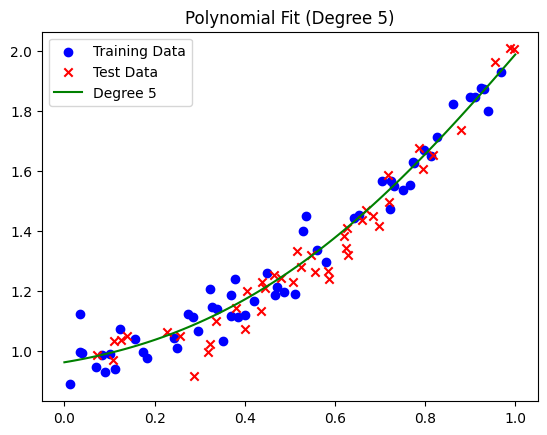

Degree 5 - Training MSE: 0.0029563104640217396, Test MSE: 0.0033137118916238112


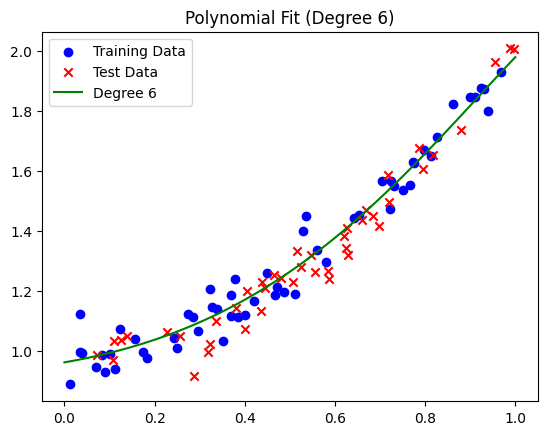

Degree 6 - Training MSE: 0.002953184445607207, Test MSE: 0.0033317351132180232


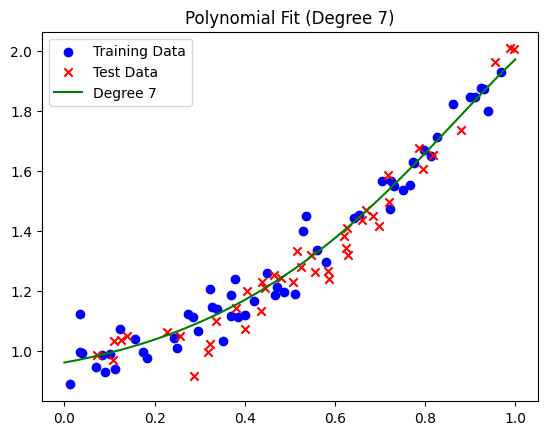

Degree 7 - Training MSE: 0.0029524832152581465, Test MSE: 0.003350521841498579


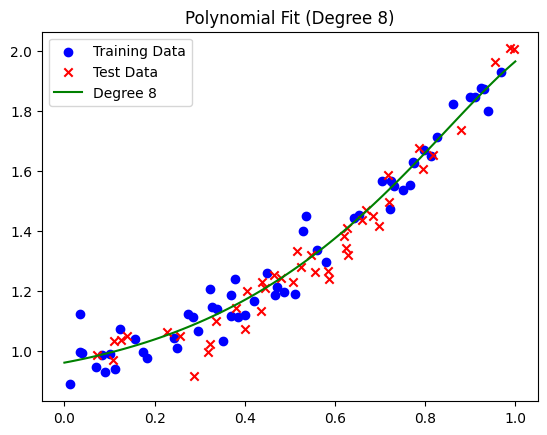

Degree 8 - Training MSE: 0.0029522924024494627, Test MSE: 0.0033708891170543486


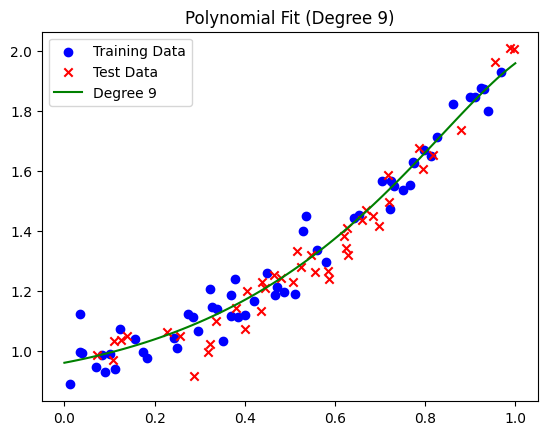

Degree 9 - Training MSE: 0.0029520011087580842, Test MSE: 0.003392960095080772
Coefficient [array([0.86753315, 0.1649134 , 0.96720573]), array([-0.20558007,  1.16297413,  0.05348709,  0.97568106]), array([ 0.00235511, -0.2102385 ,  1.16594479,  0.05283206,  0.97571262]), array([-4.37077738, 10.59890173, -9.33611301,  4.48825951, -0.41474291,
        0.99169437]), array([-15.65545201,  41.11307059, -39.46832795,  16.55686352,
        -1.80832149,   0.205155  ,   0.97586265]), array([-8.56930909e+00,  1.39672195e+01,  5.27180517e-01, -1.15150983e+01,
        6.44283390e+00,  1.34390029e-02,  6.82367026e-02,  9.78629272e-01]), array([-4.70919934e+02,  1.84341571e+03, -2.96385293e+03,  2.51899979e+03,
       -1.21133169e+03,  3.26057788e+02, -4.42111901e+01,  2.72374937e+00,
        9.33786701e-01]), array([ 4.54873816e+03, -2.06051275e+04,  3.91696949e+04, -4.05634844e+04,
        2.48486231e+04, -9.14605328e+03,  1.96118711e+03, -2.23809376e+02,
        1.15407217e+01,  8.06414449e-01])]

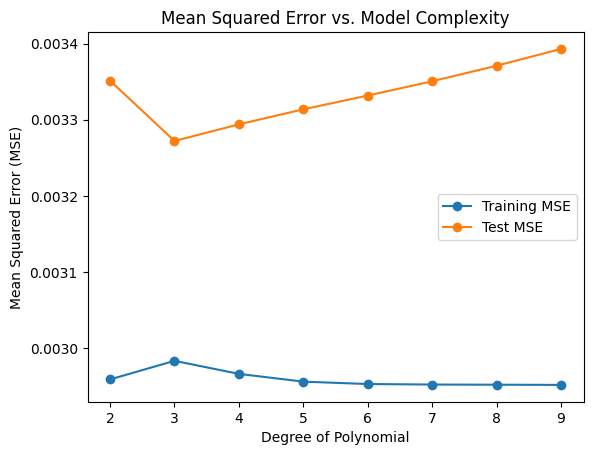

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:100], Y[:100], test_size=43, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.01))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 0.05

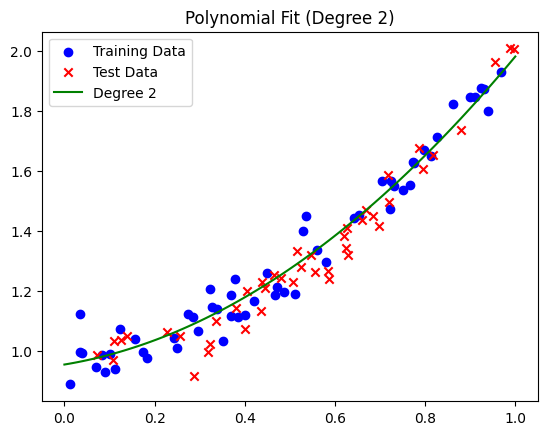

Degree 2 - Training MSE: 0.0029992796938608525, Test MSE: 0.003639284173139068


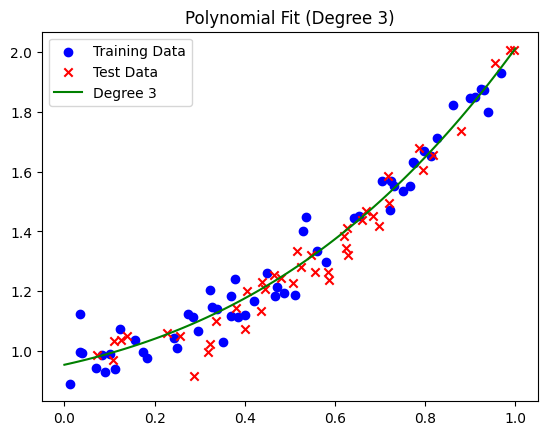

Degree 3 - Training MSE: 0.003019628356215869, Test MSE: 0.003271417459622985


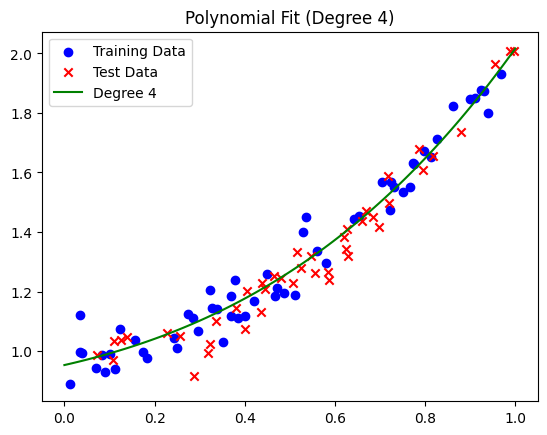

Degree 4 - Training MSE: 0.003033178636552698, Test MSE: 0.00325703241054226


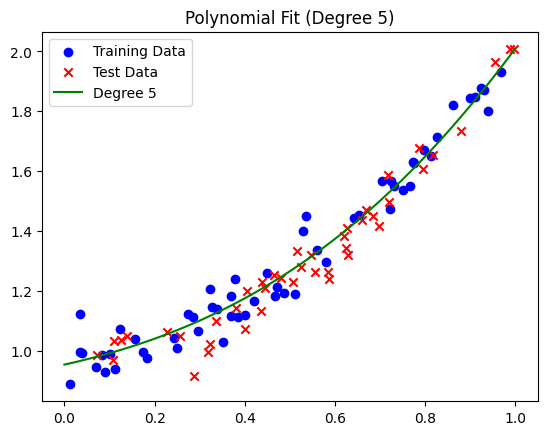

Degree 5 - Training MSE: 0.0030138646765727286, Test MSE: 0.003263788659110288


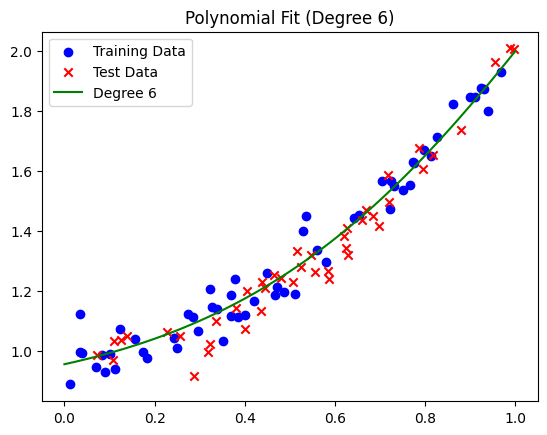

Degree 6 - Training MSE: 0.0029932757151245487, Test MSE: 0.00327129172808769


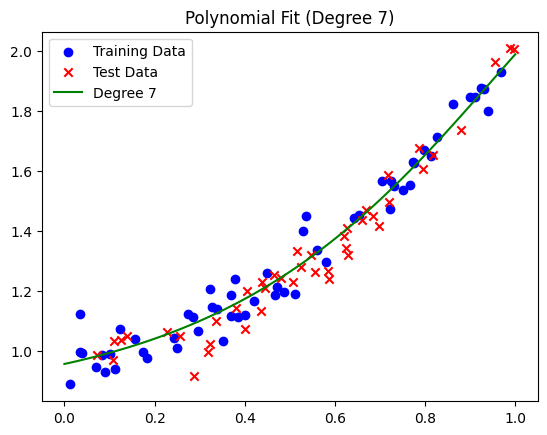

Degree 7 - Training MSE: 0.0029798269261970597, Test MSE: 0.0032839379960313457


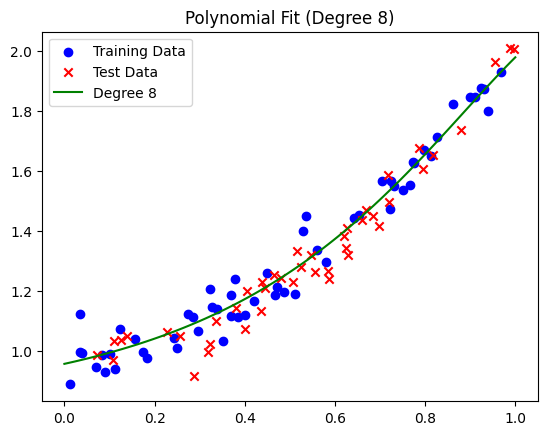

Degree 8 - Training MSE: 0.002972276302148482, Test MSE: 0.003303242789958485


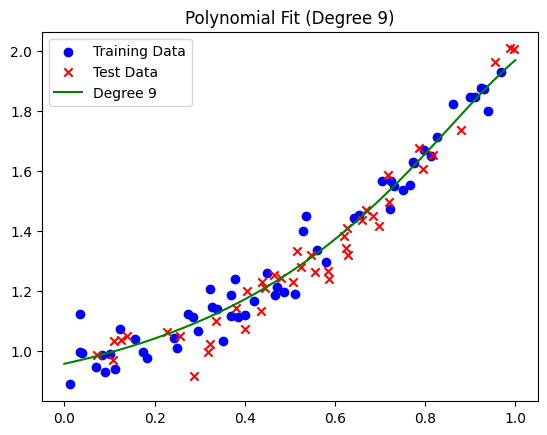

Degree 9 - Training MSE: 0.002968294295165906, Test MSE: 0.003328732483184152
Coefficient [array([0.86753315, 0.1649134 , 0.96720573]), array([-0.20558007,  1.16297413,  0.05348709,  0.97568106]), array([ 0.00235511, -0.2102385 ,  1.16594479,  0.05283206,  0.97571262]), array([-4.37077738, 10.59890173, -9.33611301,  4.48825951, -0.41474291,
        0.99169437]), array([-15.65545201,  41.11307059, -39.46832795,  16.55686352,
        -1.80832149,   0.205155  ,   0.97586265]), array([-8.56930909e+00,  1.39672195e+01,  5.27180517e-01, -1.15150983e+01,
        6.44283390e+00,  1.34390029e-02,  6.82367026e-02,  9.78629272e-01]), array([-4.70919934e+02,  1.84341571e+03, -2.96385293e+03,  2.51899979e+03,
       -1.21133169e+03,  3.26057788e+02, -4.42111901e+01,  2.72374937e+00,
        9.33786701e-01]), array([ 4.54873816e+03, -2.06051275e+04,  3.91696949e+04, -4.05634844e+04,
        2.48486231e+04, -9.14605328e+03,  1.96118711e+03, -2.23809376e+02,
        1.15407217e+01,  8.06414449e-01])]


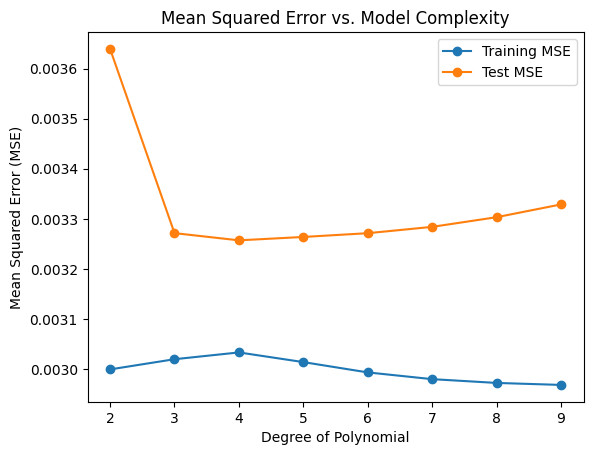

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:100], Y[:100], test_size=43, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.05))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 0.1


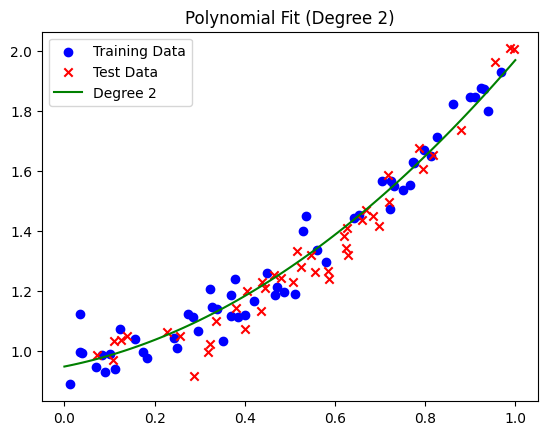

Degree 2 - Training MSE: 0.003069735825851354, Test MSE: 0.003914391372223056


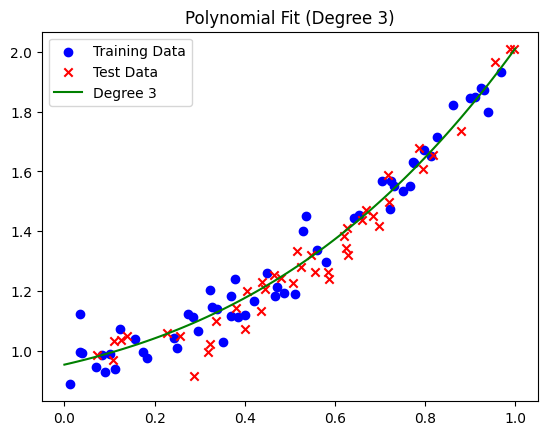

Degree 3 - Training MSE: 0.0030307869108502487, Test MSE: 0.0032807795547262013


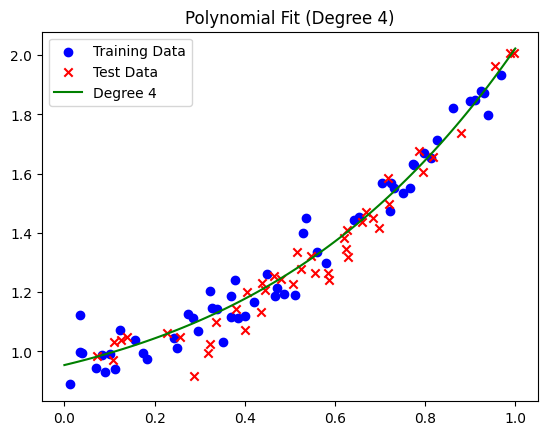

Degree 4 - Training MSE: 0.003067177562884227, Test MSE: 0.003226934943641083


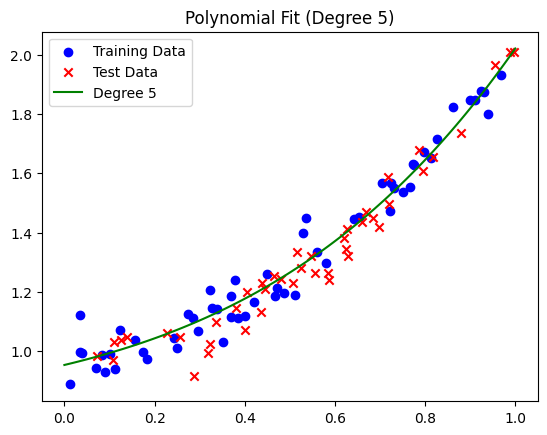

Degree 5 - Training MSE: 0.003060974244559546, Test MSE: 0.003228825676773747


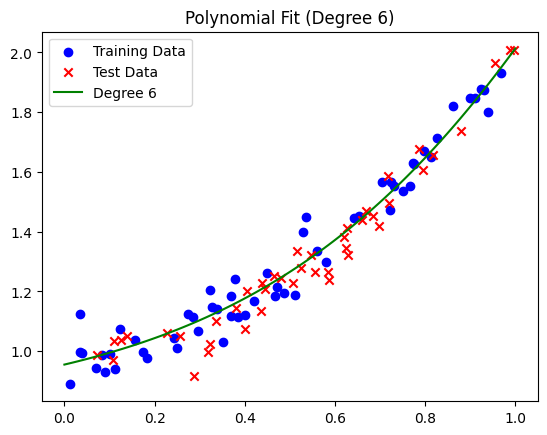

Degree 6 - Training MSE: 0.0030386811276683244, Test MSE: 0.003229939999465327


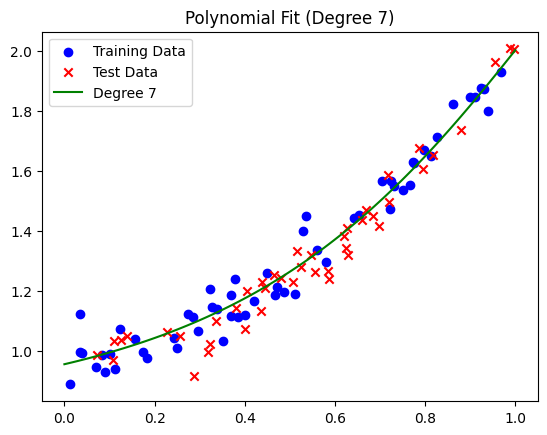

Degree 7 - Training MSE: 0.0030176087253630237, Test MSE: 0.0032330301332756622


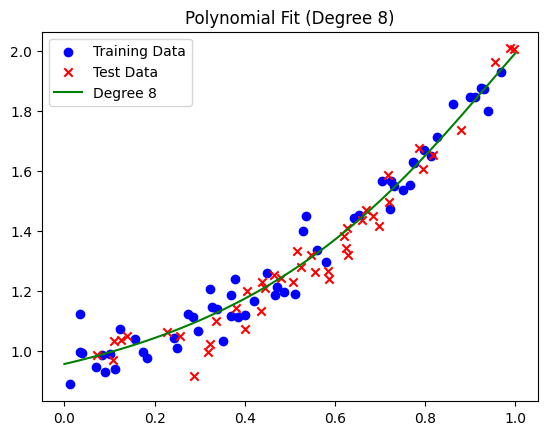

Degree 8 - Training MSE: 0.0030022654394840404, Test MSE: 0.0032427581954589113


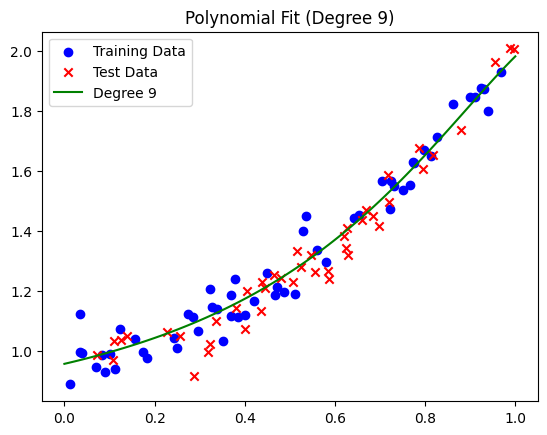

Degree 9 - Training MSE: 0.002992177403415717, Test MSE: 0.0032605477669114618
Coefficient [array([0.86753315, 0.1649134 , 0.96720573]), array([-0.20558007,  1.16297413,  0.05348709,  0.97568106]), array([ 0.00235511, -0.2102385 ,  1.16594479,  0.05283206,  0.97571262]), array([-4.37077738, 10.59890173, -9.33611301,  4.48825951, -0.41474291,
        0.99169437]), array([-15.65545201,  41.11307059, -39.46832795,  16.55686352,
        -1.80832149,   0.205155  ,   0.97586265]), array([-8.56930909e+00,  1.39672195e+01,  5.27180517e-01, -1.15150983e+01,
        6.44283390e+00,  1.34390029e-02,  6.82367026e-02,  9.78629272e-01]), array([-4.70919934e+02,  1.84341571e+03, -2.96385293e+03,  2.51899979e+03,
       -1.21133169e+03,  3.26057788e+02, -4.42111901e+01,  2.72374937e+00,
        9.33786701e-01]), array([ 4.54873816e+03, -2.06051275e+04,  3.91696949e+04, -4.05634844e+04,
        2.48486231e+04, -9.14605328e+03,  1.96118711e+03, -2.23809376e+02,
        1.15407217e+01,  8.06414449e-01])]

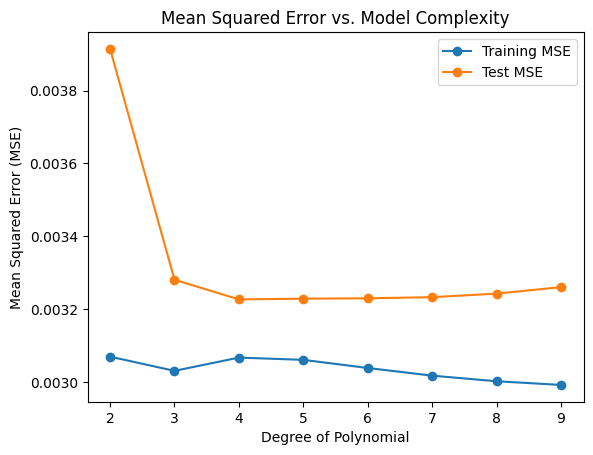

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:100], Y[:100], test_size=43, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 1

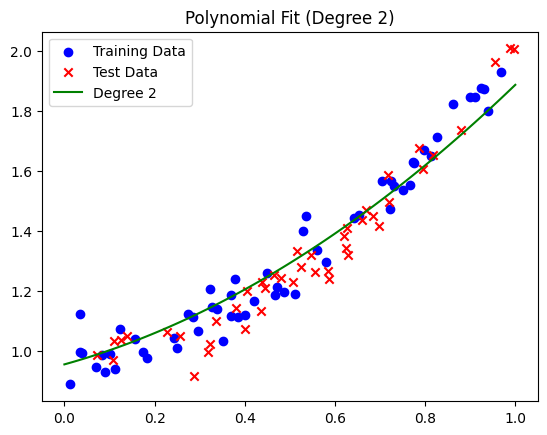

Degree 2 - Training MSE: 0.0042777667954503424, Test MSE: 0.005839376939750995


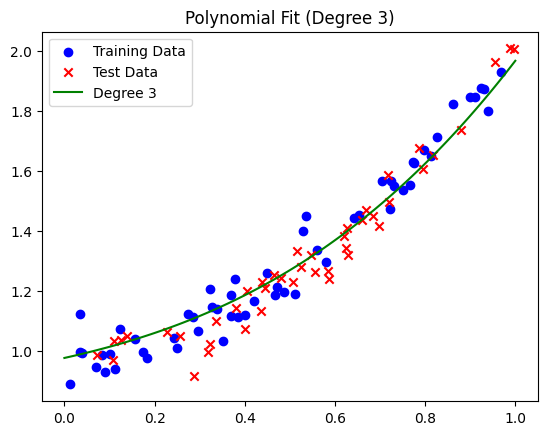

Degree 3 - Training MSE: 0.0034753418367579284, Test MSE: 0.003753173572731662


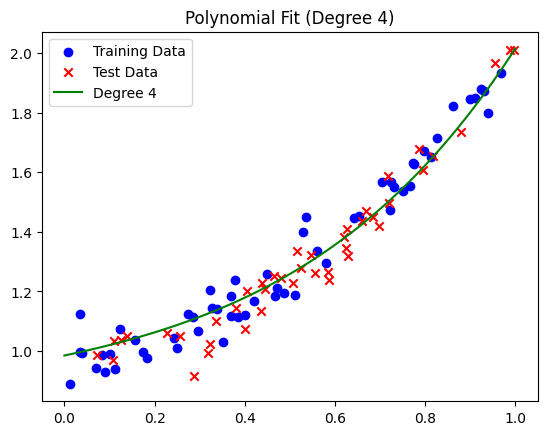

Degree 4 - Training MSE: 0.0035360810421448032, Test MSE: 0.003287040900687087


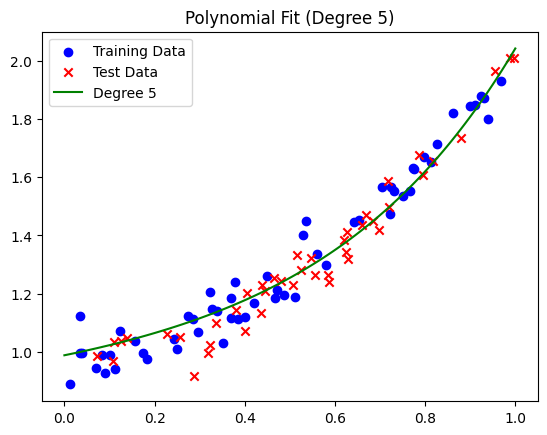

Degree 5 - Training MSE: 0.0036871547717938534, Test MSE: 0.0032478183683428423


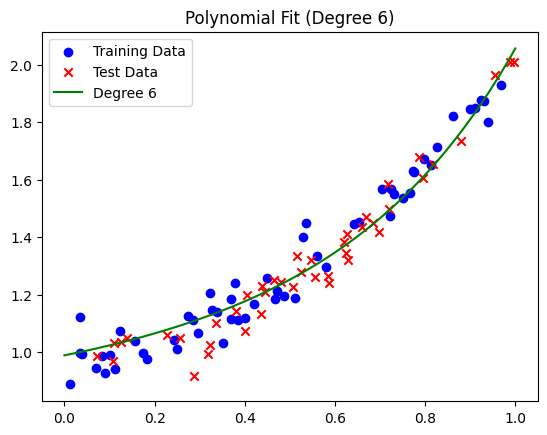

Degree 6 - Training MSE: 0.0037879468668538703, Test MSE: 0.003287176075255607


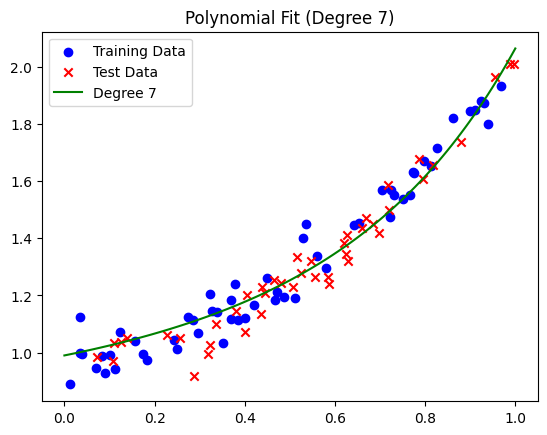

Degree 7 - Training MSE: 0.0038342084760917975, Test MSE: 0.0033173652638221265


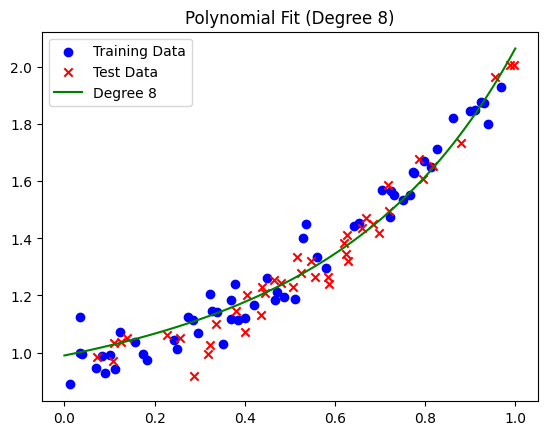

Degree 8 - Training MSE: 0.00384413757416118, Test MSE: 0.003325272832394292


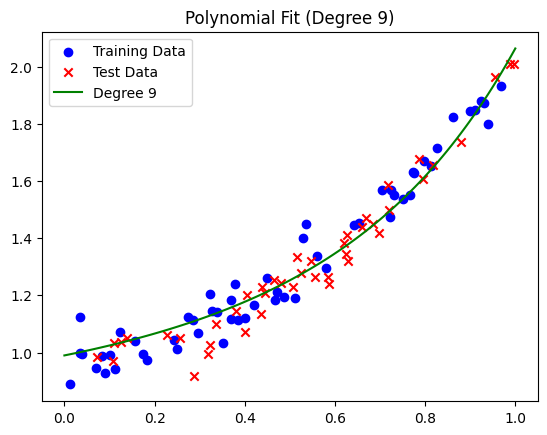

Degree 9 - Training MSE: 0.0038338207170692962, Test MSE: 0.0033161800670940414
Coefficient [array([0.86753315, 0.1649134 , 0.96720573]), array([-0.20558007,  1.16297413,  0.05348709,  0.97568106]), array([ 0.00235511, -0.2102385 ,  1.16594479,  0.05283206,  0.97571262]), array([-4.37077738, 10.59890173, -9.33611301,  4.48825951, -0.41474291,
        0.99169437]), array([-15.65545201,  41.11307059, -39.46832795,  16.55686352,
        -1.80832149,   0.205155  ,   0.97586265]), array([-8.56930909e+00,  1.39672195e+01,  5.27180517e-01, -1.15150983e+01,
        6.44283390e+00,  1.34390029e-02,  6.82367026e-02,  9.78629272e-01]), array([-4.70919934e+02,  1.84341571e+03, -2.96385293e+03,  2.51899979e+03,
       -1.21133169e+03,  3.26057788e+02, -4.42111901e+01,  2.72374937e+00,
        9.33786701e-01]), array([ 4.54873816e+03, -2.06051275e+04,  3.91696949e+04, -4.05634844e+04,
        2.48486231e+04, -9.14605328e+03,  1.96118711e+03, -2.23809376e+02,
        1.15407217e+01,  8.06414449e-01])

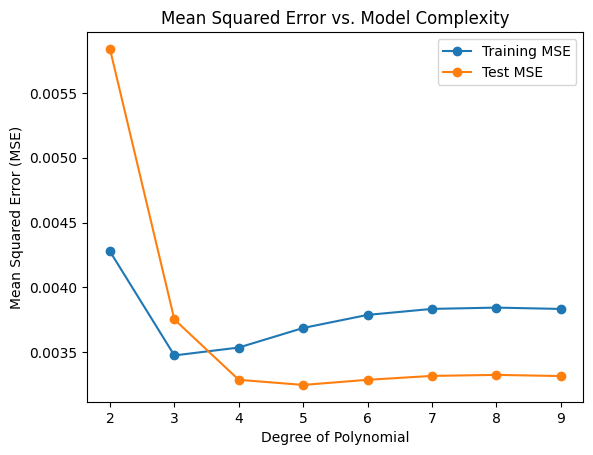

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X[:100], Y[:100], test_size=43, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


## No. of data in training set = total

### alpha = 0.01

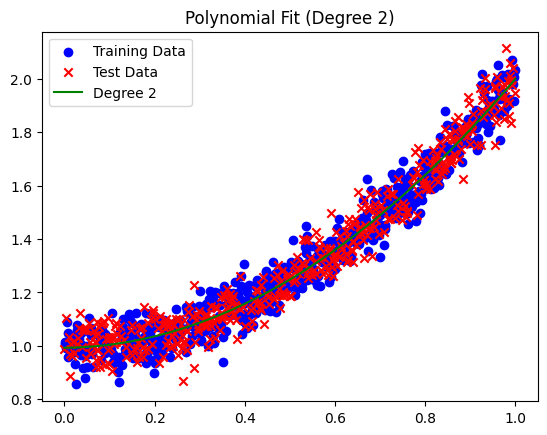

Degree 2 - Training MSE: 0.0032328458176260227, Test MSE: 0.0033739524859432942


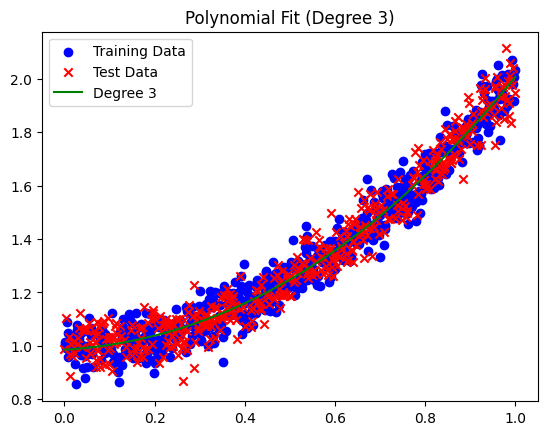

Degree 3 - Training MSE: 0.0032298358879665773, Test MSE: 0.0034053618822238907


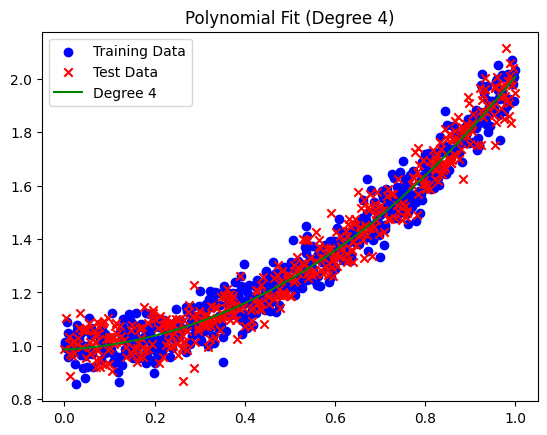

Degree 4 - Training MSE: 0.0032281558821416717, Test MSE: 0.0034082792257194234


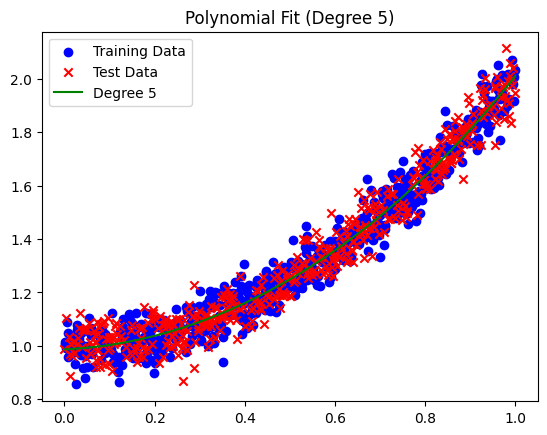

Degree 5 - Training MSE: 0.003225262825340109, Test MSE: 0.003409923176584876


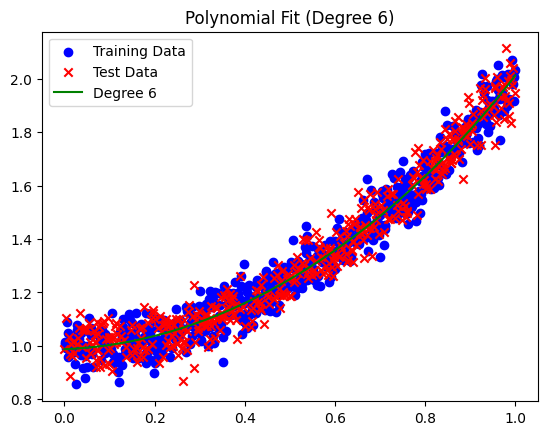

Degree 6 - Training MSE: 0.0032241498426098894, Test MSE: 0.0034107393207443775


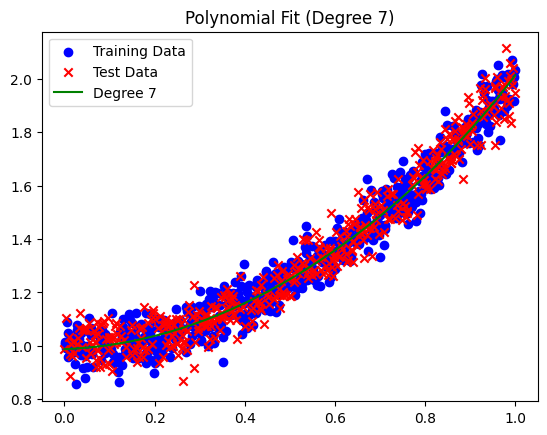

Degree 7 - Training MSE: 0.0032242944759412998, Test MSE: 0.003411291698914136


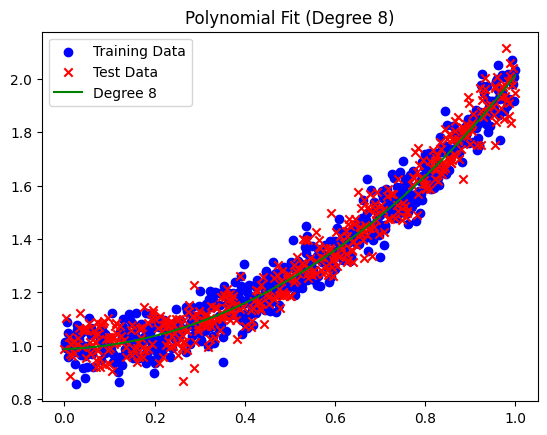

Degree 8 - Training MSE: 0.003224201671944611, Test MSE: 0.003411162529198442


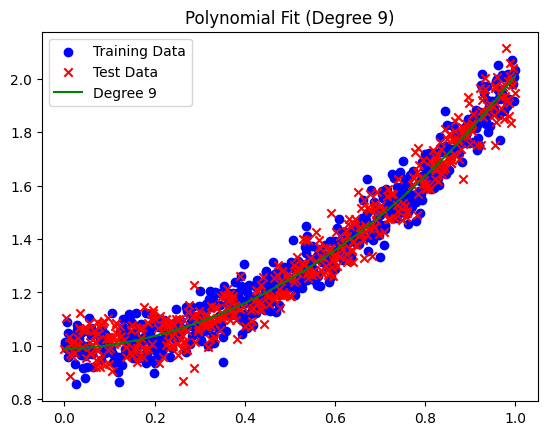

Degree 9 - Training MSE: 0.0032232695446415003, Test MSE: 0.003409924982912795
Coefficient [array([0.99389346, 0.01268678, 0.99315519]), array([0.10241474, 0.84064217, 0.07381678, 0.98808345]), array([ 0.81726045, -1.53071993,  1.88960419, -0.1589463 ,  0.99960774]), array([-1.88823069,  5.49996716, -5.65015833,  3.41289728, -0.37208259,
        1.00641619]), array([-4.01111527, 10.13738121, -8.16146382,  1.63343977,  1.5959014 ,
       -0.19234618,  1.00235429]), array([ -9.68480881,  29.95280913, -36.99391543,  24.64932086,
       -10.32996072,   3.75473909,  -0.35196777,   1.00507634]), array([-4.00167261e+01,  1.50282703e+02, -2.31075032e+02,  1.86436195e+02,
       -8.25681318e+01,  1.81896453e+01, -1.20623660e-01, -1.31931924e-01,
        1.00215239e+00]), array([-1.52067201e+02,  6.43685176e+02, -1.13508620e+03,  1.07877011e+03,
       -5.97488984e+02,  1.96353878e+02, -3.86889892e+01,  5.91392014e+00,
       -4.01415981e-01,  1.00498917e+00])]


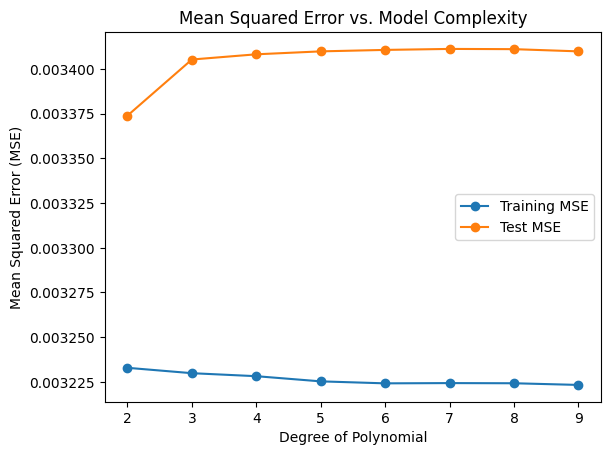

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=429, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.01))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 0.05

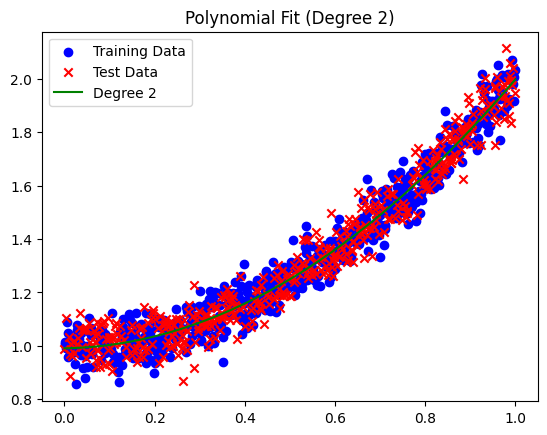

Degree 2 - Training MSE: 0.0032340427528069053, Test MSE: 0.00338351984253367


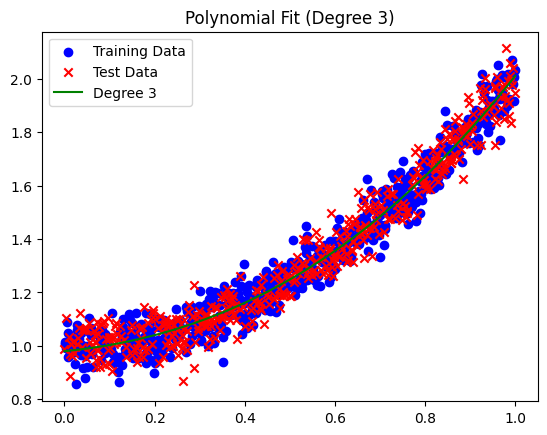

Degree 3 - Training MSE: 0.003236618581648755, Test MSE: 0.003438405304876305


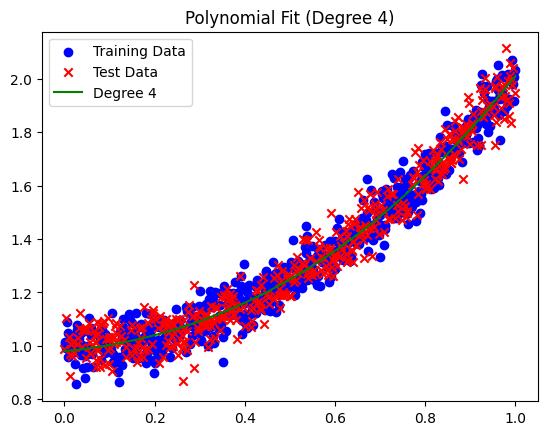

Degree 4 - Training MSE: 0.0032364736843106504, Test MSE: 0.003436721843985118


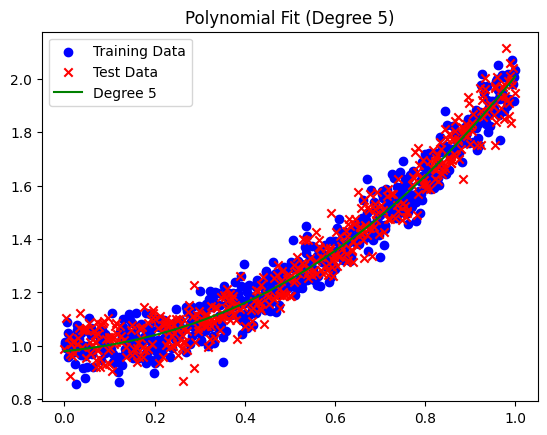

Degree 5 - Training MSE: 0.0032374020935800273, Test MSE: 0.003433459566932058


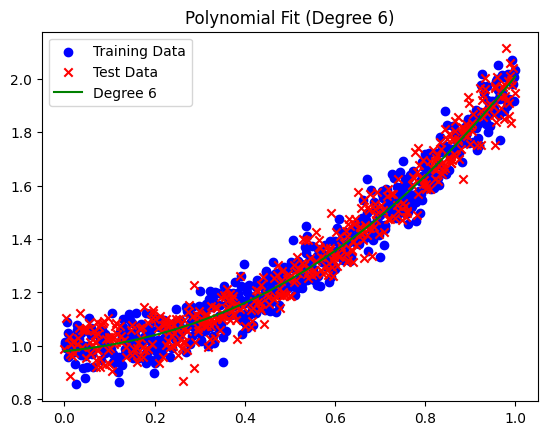

Degree 6 - Training MSE: 0.0032379890155287924, Test MSE: 0.0034329407095141443


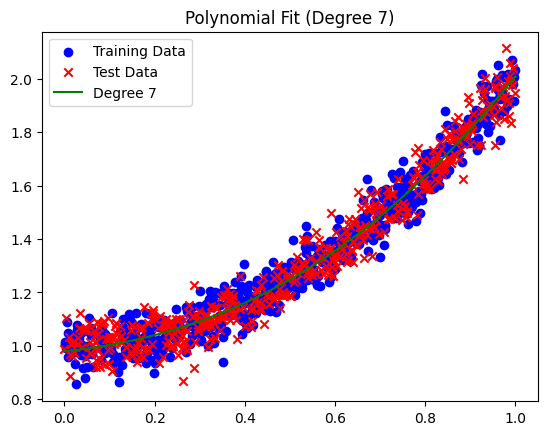

Degree 7 - Training MSE: 0.003237895786832482, Test MSE: 0.0034329660752890163


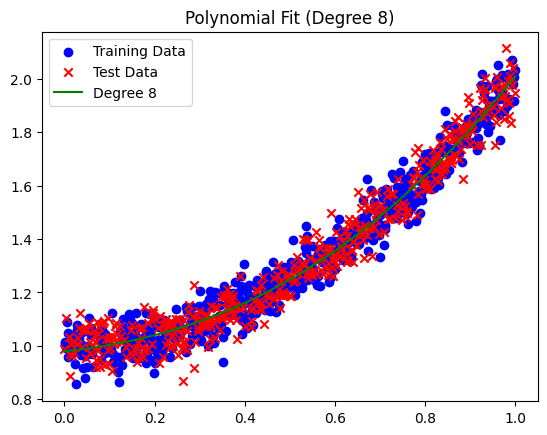

Degree 8 - Training MSE: 0.0032376872668447984, Test MSE: 0.003433004903891657


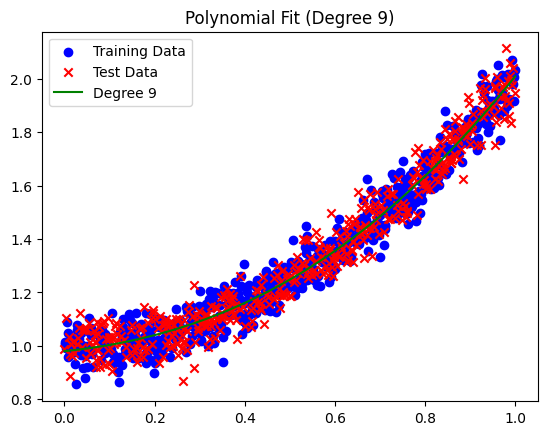

Degree 9 - Training MSE: 0.0032376284487667098, Test MSE: 0.003433083122744564
Coefficient [array([0.99389346, 0.01268678, 0.99315519]), array([0.10241474, 0.84064217, 0.07381678, 0.98808345]), array([ 0.81726045, -1.53071993,  1.88960419, -0.1589463 ,  0.99960774]), array([-1.88823069,  5.49996716, -5.65015833,  3.41289728, -0.37208259,
        1.00641619]), array([-4.01111527, 10.13738121, -8.16146382,  1.63343977,  1.5959014 ,
       -0.19234618,  1.00235429]), array([ -9.68480881,  29.95280913, -36.99391543,  24.64932086,
       -10.32996072,   3.75473909,  -0.35196777,   1.00507634]), array([-4.00167261e+01,  1.50282703e+02, -2.31075032e+02,  1.86436195e+02,
       -8.25681318e+01,  1.81896453e+01, -1.20623660e-01, -1.31931924e-01,
        1.00215239e+00]), array([-1.52067201e+02,  6.43685176e+02, -1.13508620e+03,  1.07877011e+03,
       -5.97488984e+02,  1.96353878e+02, -3.86889892e+01,  5.91392014e+00,
       -4.01415981e-01,  1.00498917e+00])]


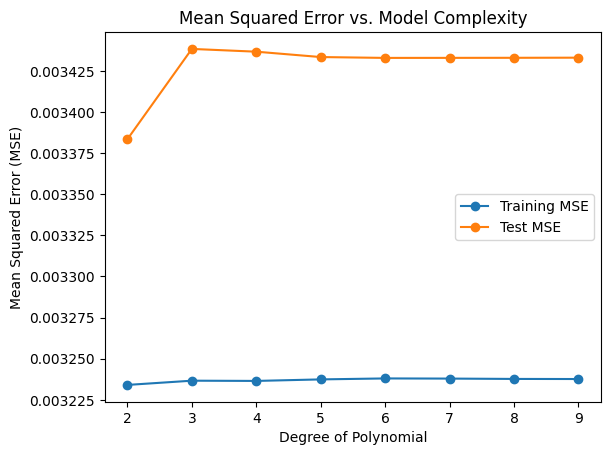

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=429, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.05))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 0.1

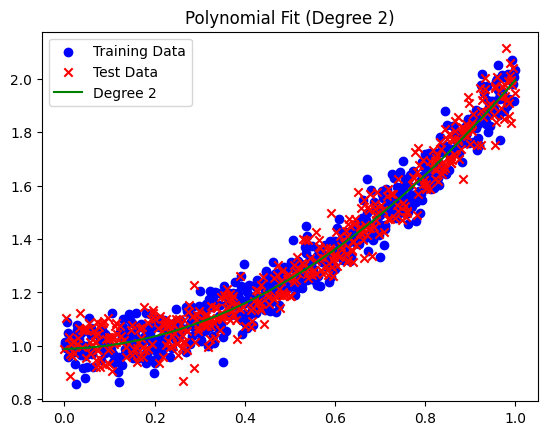

Degree 2 - Training MSE: 0.0032375000560608096, Test MSE: 0.003396888179161583


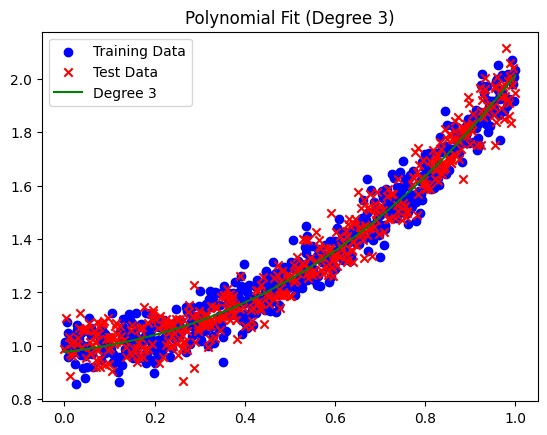

Degree 3 - Training MSE: 0.003243032760870281, Test MSE: 0.003458951078882364


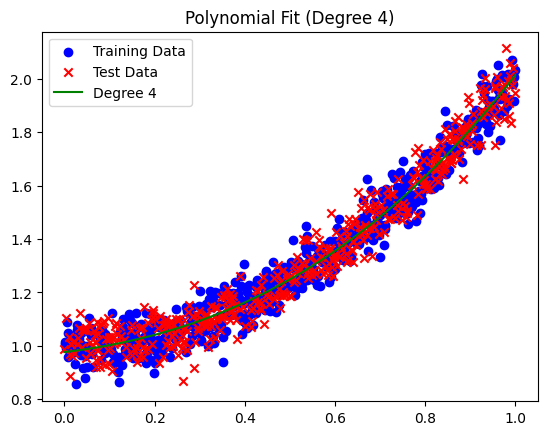

Degree 4 - Training MSE: 0.0032440677887059398, Test MSE: 0.0034633230463355234


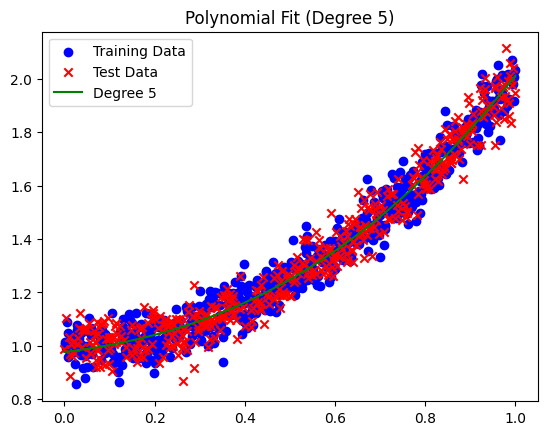

Degree 5 - Training MSE: 0.003243677987009501, Test MSE: 0.0034547221591258058


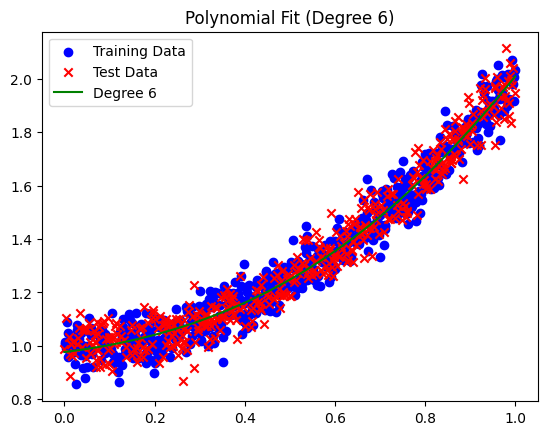

Degree 6 - Training MSE: 0.00324492355316861, Test MSE: 0.0034508090738078825


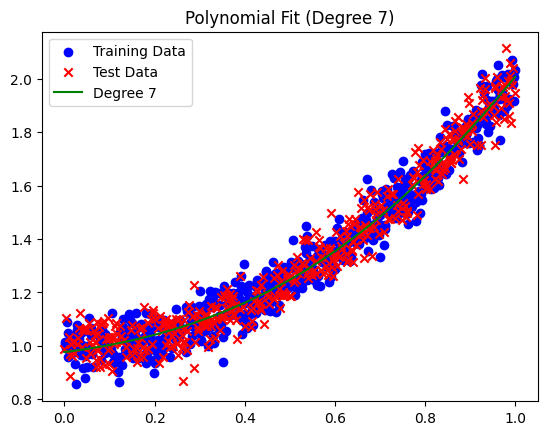

Degree 7 - Training MSE: 0.0032460266198840867, Test MSE: 0.0034498206802138732


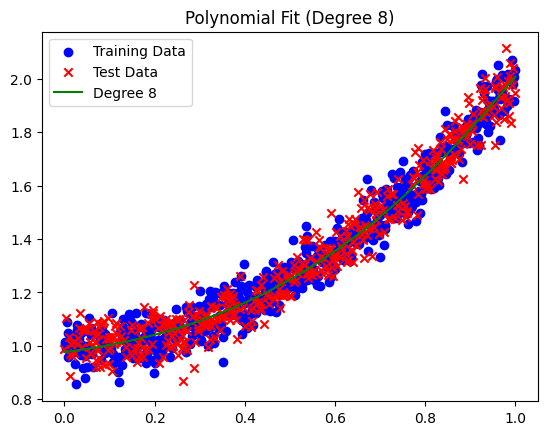

Degree 8 - Training MSE: 0.00324652492186537, Test MSE: 0.0034496839415492264


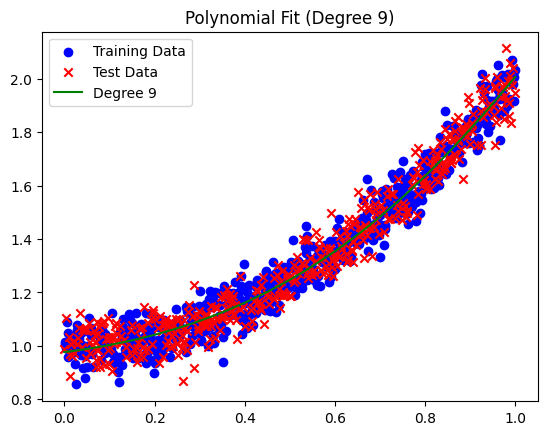

Degree 9 - Training MSE: 0.003246644034033638, Test MSE: 0.0034496736395957443
Coefficient [array([0.99389346, 0.01268678, 0.99315519]), array([0.10241474, 0.84064217, 0.07381678, 0.98808345]), array([ 0.81726045, -1.53071993,  1.88960419, -0.1589463 ,  0.99960774]), array([-1.88823069,  5.49996716, -5.65015833,  3.41289728, -0.37208259,
        1.00641619]), array([-4.01111527, 10.13738121, -8.16146382,  1.63343977,  1.5959014 ,
       -0.19234618,  1.00235429]), array([ -9.68480881,  29.95280913, -36.99391543,  24.64932086,
       -10.32996072,   3.75473909,  -0.35196777,   1.00507634]), array([-4.00167261e+01,  1.50282703e+02, -2.31075032e+02,  1.86436195e+02,
       -8.25681318e+01,  1.81896453e+01, -1.20623660e-01, -1.31931924e-01,
        1.00215239e+00]), array([-1.52067201e+02,  6.43685176e+02, -1.13508620e+03,  1.07877011e+03,
       -5.97488984e+02,  1.96353878e+02, -3.86889892e+01,  5.91392014e+00,
       -4.01415981e-01,  1.00498917e+00])]


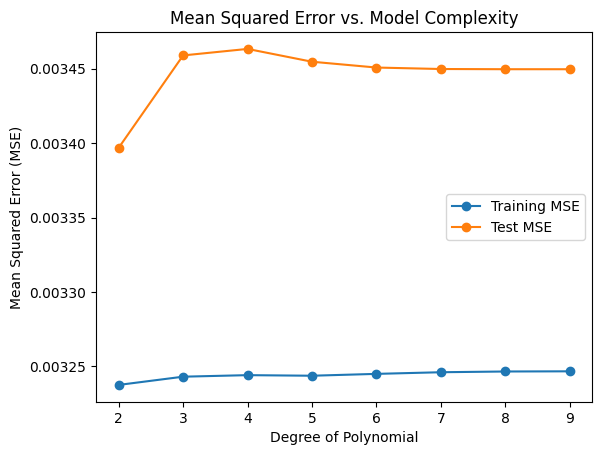

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=429, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()


### alpha = 1

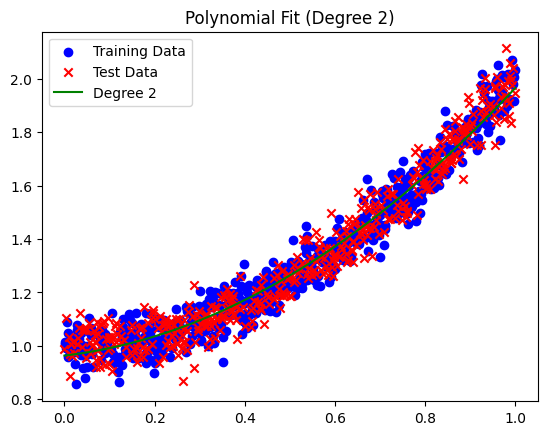

Degree 2 - Training MSE: 0.0034360291208996143, Test MSE: 0.0037082811953300303


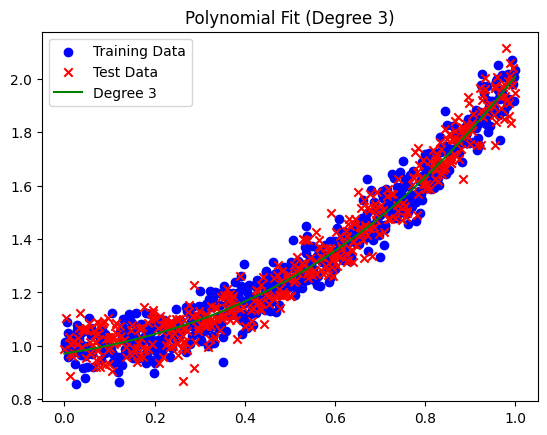

Degree 3 - Training MSE: 0.003266766604856988, Test MSE: 0.003513763715434371


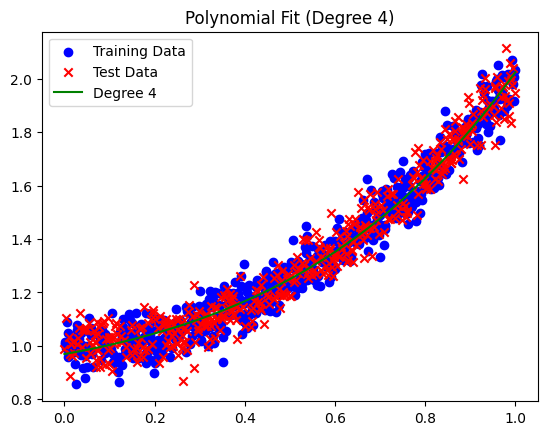

Degree 4 - Training MSE: 0.0032992850469154207, Test MSE: 0.0035754158942052318


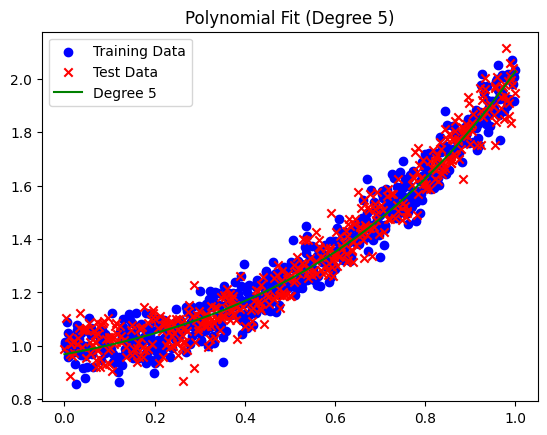

Degree 5 - Training MSE: 0.0033097965139204434, Test MSE: 0.0035955638631948086


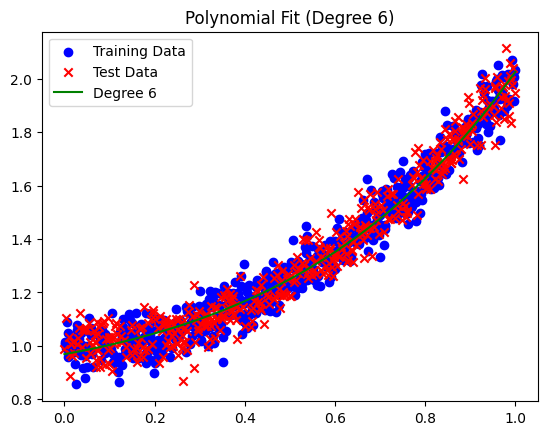

Degree 6 - Training MSE: 0.0033049749366645953, Test MSE: 0.0035852868877711075


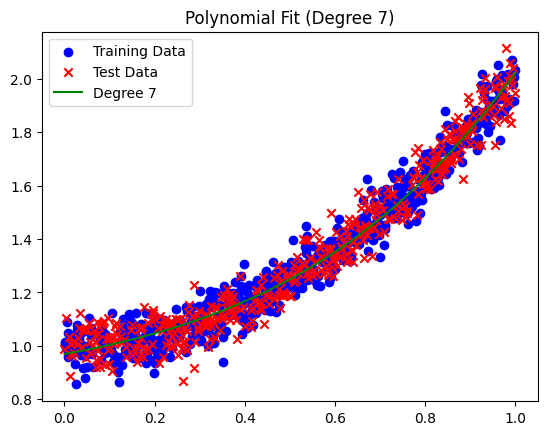

Degree 7 - Training MSE: 0.0032978386583298273, Test MSE: 0.0035673038206452375


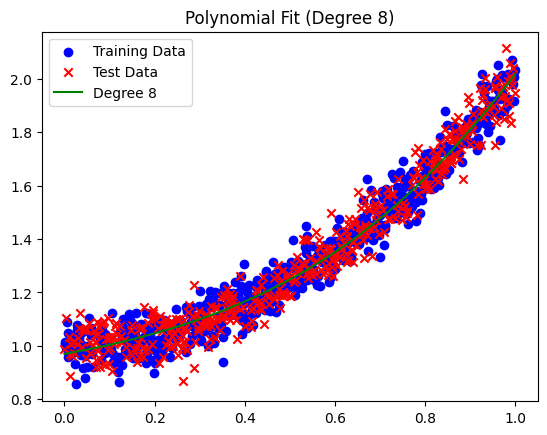

Degree 8 - Training MSE: 0.0032930373484620222, Test MSE: 0.00355157861537451


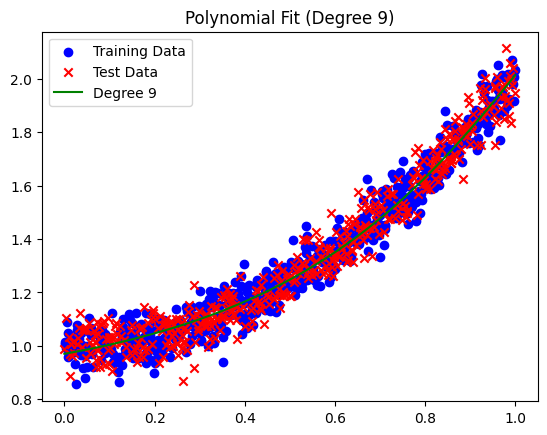

Degree 9 - Training MSE: 0.00329093484246308, Test MSE: 0.0035404237758536778
Coefficient [array([0.99389346, 0.01268678, 0.99315519]), array([0.10241474, 0.84064217, 0.07381678, 0.98808345]), array([ 0.81726045, -1.53071993,  1.88960419, -0.1589463 ,  0.99960774]), array([-1.88823069,  5.49996716, -5.65015833,  3.41289728, -0.37208259,
        1.00641619]), array([-4.01111527, 10.13738121, -8.16146382,  1.63343977,  1.5959014 ,
       -0.19234618,  1.00235429]), array([ -9.68480881,  29.95280913, -36.99391543,  24.64932086,
       -10.32996072,   3.75473909,  -0.35196777,   1.00507634]), array([-4.00167261e+01,  1.50282703e+02, -2.31075032e+02,  1.86436195e+02,
       -8.25681318e+01,  1.81896453e+01, -1.20623660e-01, -1.31931924e-01,
        1.00215239e+00]), array([-1.52067201e+02,  6.43685176e+02, -1.13508620e+03,  1.07877011e+03,
       -5.97488984e+02,  1.96353878e+02, -3.86889892e+01,  5.91392014e+00,
       -4.01415981e-01,  1.00498917e+00])]


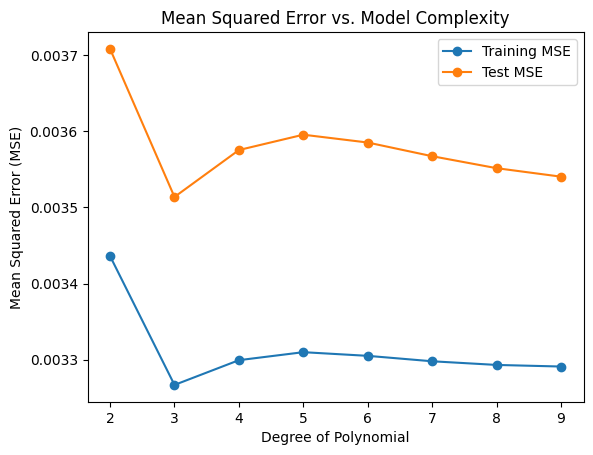

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Replace 'your_dataset.csv' with the actual file path
file_path = '/content/drive/MyDrive/Regression/UnivariateData/13.csv'

# Read the CSV file without header names
df = pd.read_csv(file_path, header=None)

# Extract X and Y columns
X = df.iloc[:, 0].values
Y = df.iloc[:, 1].values

# a. Training datasets of size 10 and testing data of size 3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=429, random_state=42)

# b. Model complexity (degree of polynomial): 2 to 9
degrees = range(2, 10)

# Lists to store MSE values
mse_train_values = []
mse_test_values = []

# Function to fit and plot polynomial curve
def fit_and_plot(X_train, y_train, X_test, y_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1))  # No regularization for simplicity
    model.fit(X_train.reshape(-1, 1), y_train)

    # Plotting
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='red', marker='x')

    x_range = np.linspace(min(X), max(X), 100)
    plt.plot(x_range, model.predict(x_range.reshape(-1, 1)), label=f'Degree {degree}', color='green')

    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

    # Calculate MSE for training and test data
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f'Degree {degree} - Training MSE: {mse_train}, Test MSE: {mse_test}')

    # Append MSE values to lists for later plotting
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

# Plotting for different degrees and calculating MSE
for degree in degrees:
    fit_and_plot(X_train, y_train, X_test, y_test, degree)

coefficient=[]
for degree in degrees:
    coefficient.append(np.polyfit(X_train, y_train, degree))

print("Coefficient",coefficient)

# Display Plots of the values of mean squared error (MSE) on training data and test data
plt.plot(degrees, mse_train_values, label='Training MSE', marker='o')
plt.plot(degrees, mse_test_values, label='Test MSE', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error vs. Model Complexity')
plt.legend()
plt.show()
